# Importing all required Libraries

In [1]:
#libraries for data manipulation
import pandas as pd 
import numpy as np

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder



# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# we can get the values with most missing values
# Function to calculate missing values by column# Funct 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Lobraries for Model Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Libraries for Classifiers
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Library to split data into train/test
from sklearn.model_selection import train_test_split

# libraries for feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# library for imbalance classification
from imblearn.over_sampling import RandomOverSampler

# library to calculate f1-score
from sklearn.metrics import f1_score

# library to calculate accuracy score
from sklearn.metrics import accuracy_score


Loading Data frame

In [2]:
# loading the data set 
df_1 = pd.read_csv('BankLoan.csv')

#                                Exploratiry_Data_Analysis 

In [3]:
#                              EXPLORATORY-DATA-ANALYSIS
df_1.shape

(307511, 122)

In [4]:
print('Total Number of Features =',len(df_1.columns))

Total Number of Features = 122


In [5]:
index=df_1.index
print('Total Number of data points =',len(index))

Total Number of data points = 307511


In [6]:
#checking types of features
df_1.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
#indentifying number of loans falling into each category

# 0 = will repay loan on time
# 1 = will have difficulty in repaying laon

df_1['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

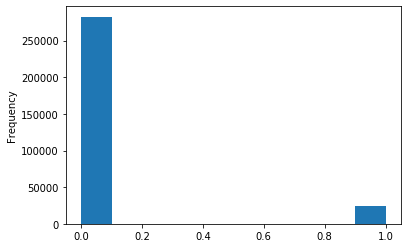

In [8]:
# as the number of loans accepted is very much more than the number of laons rejected 
# We can say that we also have a problem of imbalanced classification 

#we can also visualize it
df_1['TARGET'].astype(int).plot.hist()

In [9]:
def find_cat_val(df):
    # names of all the categorical features and total number of categories in each feature

    # Number of unique classes in each object column 
    print(df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
    
find_cat_val(df_1)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64


In [10]:
# Names of all the Numeric Features

df_numeric = df_1.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['SK_ID_CURR' 'TARGET' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH'
 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE'
 'FLAG_MOBIL' 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE'
 'FLAG_PHONE' 'FLAG_EMAIL' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'HOUR_APPR_PROCESS_START'
 'REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'
 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOORSMAX_AVG' 'FLOORSMIN_AVG'
 'LANDAREA_AVG' 'LIVINGAPARTMENTS_AVG' 'LIVINGAREA_AVG'
 'NONLIVINGAPARTMENTS_AVG' 'NONLIVINGAREA_AVG' 'APARTMENTS_MODE'
 'BASEMENTAREA_MODE' 'YEARS_BEGINEXPLUATATION_MODE' 'YEARS_BUILD_MODE'
 'COMMONAREA_MODE' 'E

In [11]:
# Names of all the categorical  features

df_non_numeric = df_1.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR' 'FLAG_OWN_REALTY'
 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE' 'NAME_EDUCATION_TYPE'
 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE' 'OCCUPATION_TYPE'
 'WEEKDAY_APPR_PROCESS_START' 'ORGANIZATION_TYPE' 'FONDKAPREMONT_MODE'
 'HOUSETYPE_MODE' 'WALLSMATERIAL_MODE' 'EMERGENCYSTATE_MODE']


In [12]:
print('Total numeric Features =',len(numeric_cols),'\n','Total Catagorical Features =',len(non_numeric_cols))

Total numeric Features = 106 
 Total Catagorical Features = 16


In [13]:
# Function to plot the stats of features
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df_1[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df_1[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

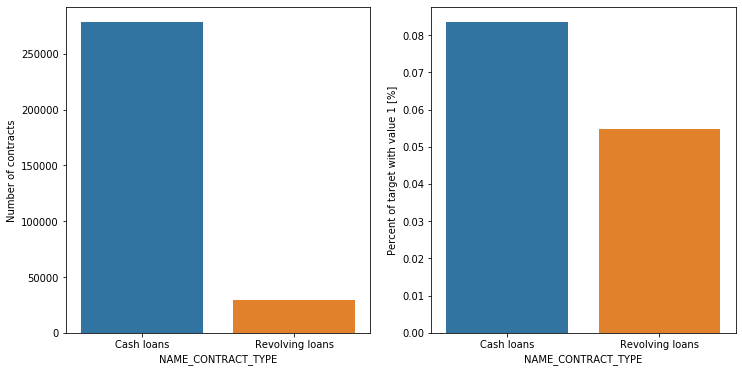

In [14]:
plot_stats('NAME_CONTRACT_TYPE')

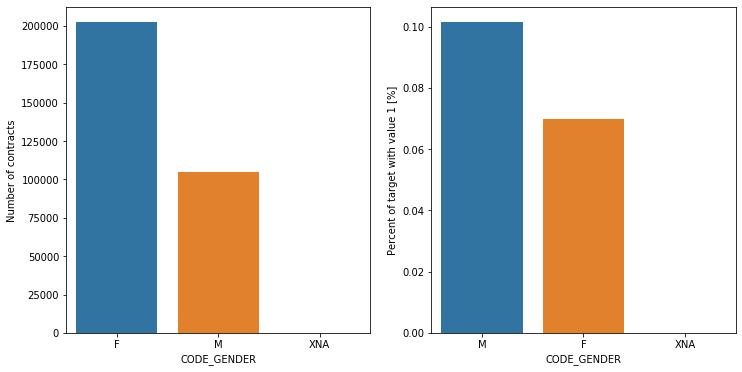

In [15]:
plot_stats('CODE_GENDER')

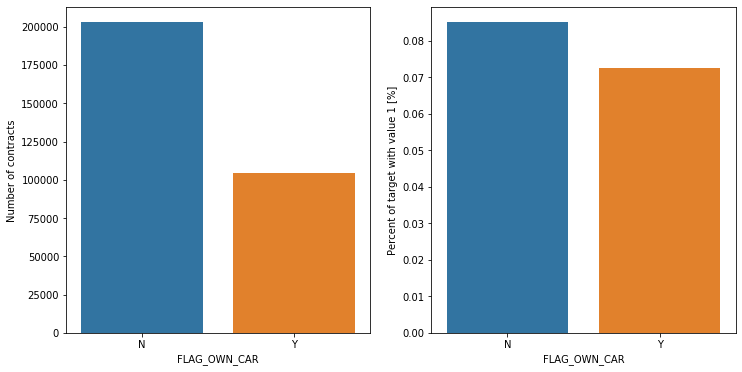

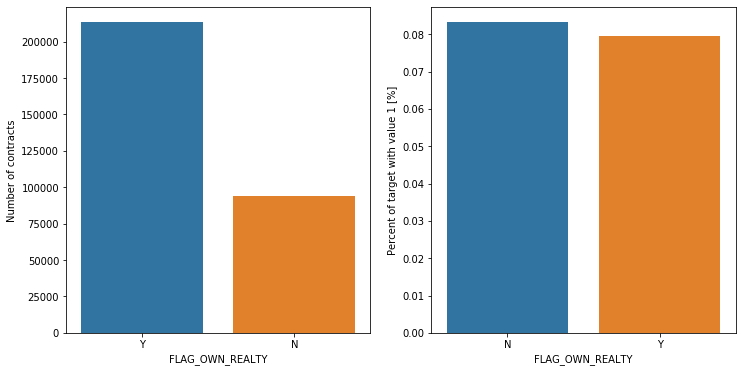

In [16]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')


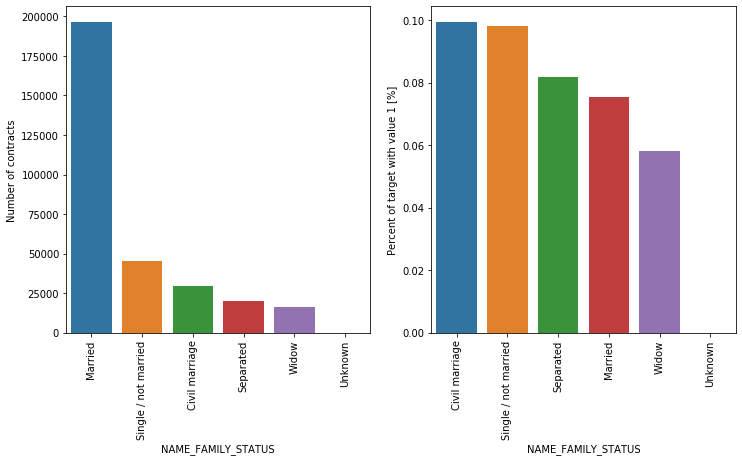

In [17]:
plot_stats('NAME_FAMILY_STATUS',True, True)

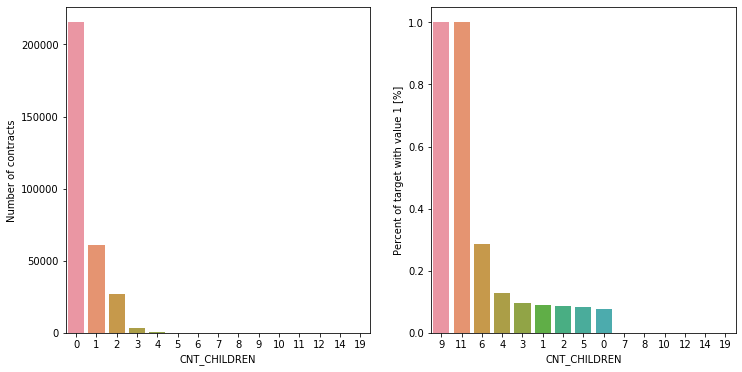

In [18]:
plot_stats('CNT_CHILDREN')

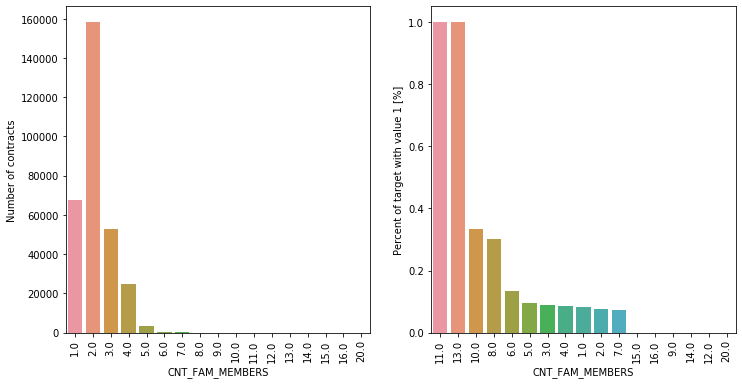

In [19]:
plot_stats('CNT_FAM_MEMBERS',True)

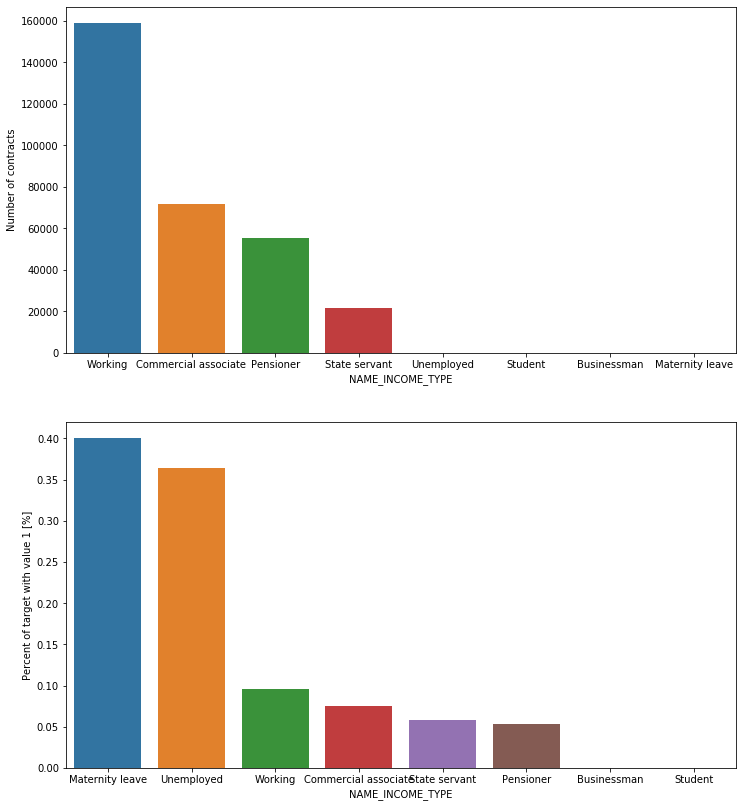

In [20]:
plot_stats('NAME_INCOME_TYPE',False,False)

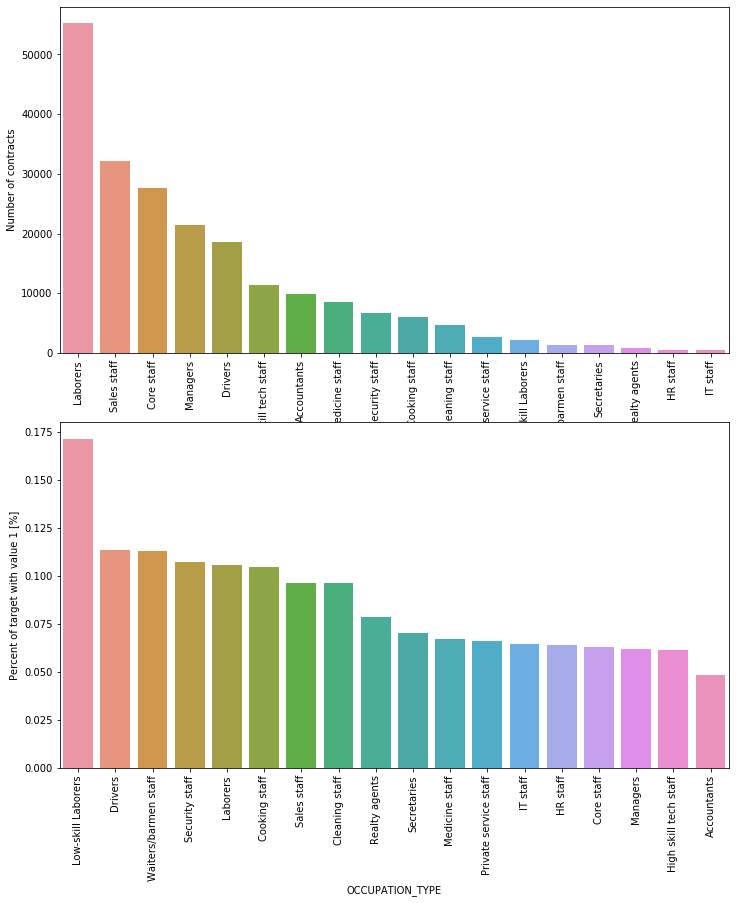

In [21]:
plot_stats('OCCUPATION_TYPE',True, False)

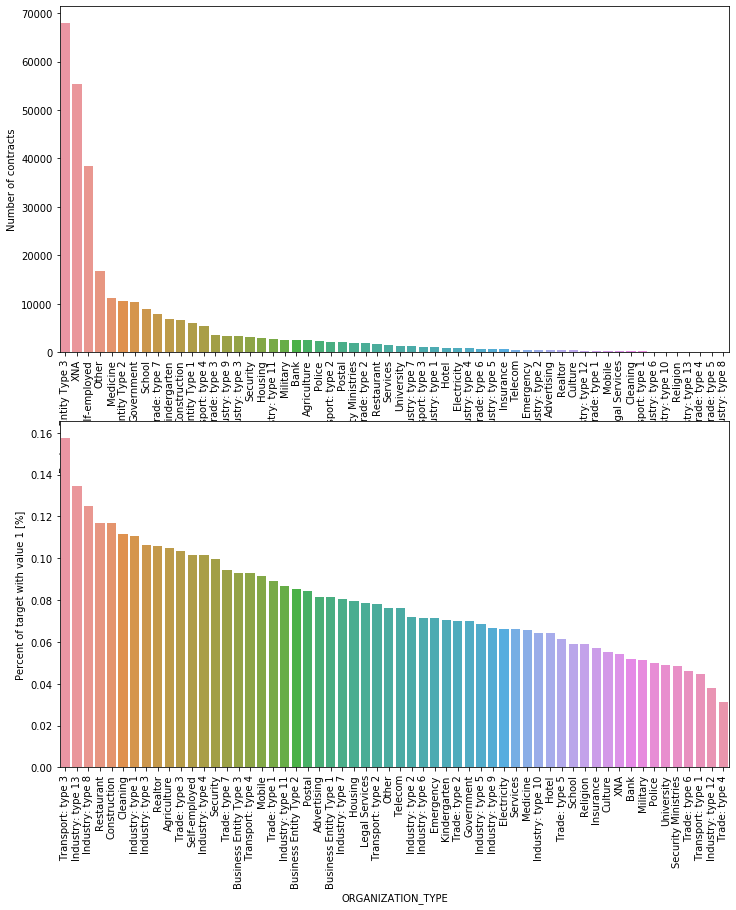

In [22]:
plot_stats('ORGANIZATION_TYPE',True, False)

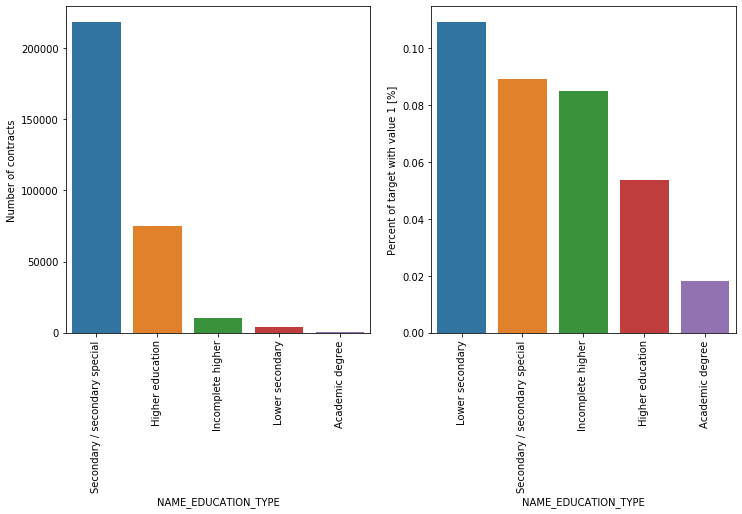

In [23]:
plot_stats('NAME_EDUCATION_TYPE',True)

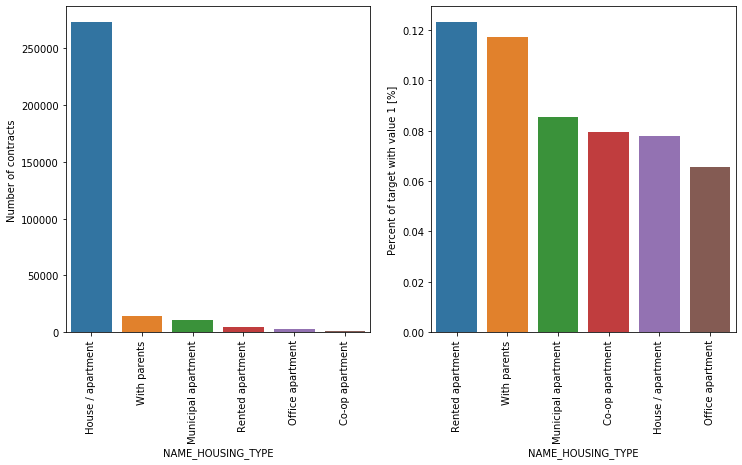

In [24]:
plot_stats('NAME_HOUSING_TYPE',True)

In [25]:
# We can to keep the original dataframe so we will create a new Dataframe

df_2=df_1

df_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Data_Pre_Processing

# Label_Encoder

In [26]:
#                                PREPARING THE INITIAL-DATA-SET

# Machine learning models only work on numerical data so first we have to encode our features

# Label encoding those features which have only 2 categorical features
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_2:
    if df_2[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_2[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_2[col])
            # Transform both training and testing data
            df_2[col] = le.transform(df_2[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [27]:
df_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [28]:
# Now we will do one-hot-encoding for categorical feature having categories more than 2 
find_cat_val(df_2)


CODE_GENDER                    3
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64


# One_Hot_Encoding

In [29]:
def one_hot_encode(col,dataframe):
    dummies_train = pd.get_dummies(col)
    new_df = pd.concat([dataframe,dummies_train],axis='columns')
    return new_df

In [30]:
df_3=one_hot_encode(df_2.CODE_GENDER,df_2)
df_4=one_hot_encode(df_3.NAME_TYPE_SUITE,df_3)
df_5=one_hot_encode(df_4.NAME_INCOME_TYPE,df_4)
df_6=one_hot_encode(df_5.NAME_EDUCATION_TYPE,df_5)
df_7=one_hot_encode(df_6.NAME_FAMILY_STATUS,df_6)
df_8=one_hot_encode(df_7.NAME_HOUSING_TYPE,df_7)
df_9=one_hot_encode(df_8.WEEKDAY_APPR_PROCESS_START,df_8)
df_10=one_hot_encode(df_9.FONDKAPREMONT_MODE,df_9)
df_11=one_hot_encode(df_10.HOUSETYPE_MODE,df_10)
df_12=one_hot_encode(df_11.WALLSMATERIAL_MODE,df_11)

df_12.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,F,M,XNA,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Unknown,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,not specified,org spec account,reg oper account,reg oper spec account,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.

# One_Hot_Encoding_Multi_Category

In [31]:
# one hot encoding for multi-category 
df_12.ORGANIZATION_TYPE = df_12.ORGANIZATION_TYPE.apply(lambda x:x.strip())

stats= df_12.groupby('ORGANIZATION_TYPE')['ORGANIZATION_TYPE'].agg('count').sort_values(ascending=False)
stats

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [32]:
location_less_than_6000 = stats[stats<=6000]

In [33]:
#this location is Other_Val if x is in location less_than_6000 else what ever is value you keep it
df_12.ORGANIZATION_TYPE=df_12.ORGANIZATION_TYPE.apply(lambda x:'Other_val' if x in location_less_than_6000 else x)

len(df_12.ORGANIZATION_TYPE.unique())

12

In [34]:
stats_1= df_12.groupby('OCCUPATION_TYPE')['OCCUPATION_TYPE'].agg('count').sort_values(ascending=False)
stats_1

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [35]:
org_less_than_10000 = stats_1[stats_1<=10000]

In [36]:
df_12.OCCUPATION_TYPE=df_12.OCCUPATION_TYPE.apply(lambda x:'Other' if x in org_less_than_10000 else x)

len(df_12.OCCUPATION_TYPE.unique())

8

In [37]:
df_13=one_hot_encode(df_12.ORGANIZATION_TYPE,df_12)
df_14=one_hot_encode(df_13.OCCUPATION_TYPE,df_13)

df_14.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,F,M,XNA,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Unknown,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,not specified,org spec account,reg oper account,reg oper spec account,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,Business Entity Type 2,Business Entity Type 3,Construction,Government,Kindergarten,Medicine,Other,Other_val,School,Self-employed,Trade: type 7,XNA,Core staff,Drivers,High skill tech staff,Laborers,Managers,Other,Sales staff
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,100003,0,0,F,0,0,0,27

In [38]:
# Now we will remove all the non-numeric features from our data-set
df_14=df_14.drop(df_14.select_dtypes('object'),axis='columns')

df_14.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,F,M,XNA,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Unknown,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,not specified,org spec account,reg oper account,reg oper spec account,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,Business Entity Type 2,Business Entity Type 3,Construction,Government,Kindergarten,Medicine,Other,Other_val,School,Self-employed,Trade: type 7,XNA,Core staff,Drivers,High skill tech staff,Laborers,Managers,Other,Sales staff
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,

In [39]:
# Now let us look at shape of our data-set

df_14.shape

(307511, 184)

# Removing_Collinear_Features 

In [40]:
#                               REMOVING-COLLINEAR FEATURESS

# Collinear features decrease the learning ability of our classifier so we have to remove them
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = df_14.corr()
corr_matrix.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,F,M,XNA,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Unknown,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,not specified,org spec account,reg oper account,reg oper spec account,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,Business Entity Type 2,Business Entity Type 3,Construction,Government,Kindergarten,Medicine,Other,Other_val,School,Self-employed,Trade: type 7,XNA,Core staff,Drivers,High skill tech staff,Laborers,Managers,Other,Sales staff
SK_ID_CURR,1.000000,-0.002108,0.001654,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.001818,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000082,0.002342,0.000222,0.001556,-0.002070,0.001551,0.005900,-0.001463,0.004862,-0.002879,0.004851,0.003083,0.001465,0.003119,0.001770,-0.002575,0.003042,0.001961,-0.001411,0.001890,0.005245,-0.001058,0.005017,-0.002844,0.004386,0.002081,0.001548,0.003589,0.002156,-0.001923,0.001920,0.001988,-0.001647,0.001366,0.005777,-0.001036,0.005067,-0.002583,0.004588,0.002837,0.001699,0.003272,0.002205,-0.003020,0.002440,0.002288,-0.001409,-0.000082,-0.001423,0.001187,-0.000858,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659,0.000749,-0.000728,-0.002721,-0.001234,-0.000849,0.000292,0.000356,0.002849,-0.000131,0.

In [41]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,F,M,XNA,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Unknown,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,not specified,org spec account,reg oper account,reg oper spec account,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,Business Entity Type 2,Business Entity Type 3,Construction,Government,Kindergarten,Medicine,Other,Other_val,School,Self-employed,Trade: type 7,XNA,Core staff,Drivers,High skill tech staff,Laborers,Managers,Other,Sales staff
SK_ID_CURR,NaN,-0.002108,0.001654,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.001818,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000082,0.002342,0.000222,0.001556,-0.002070,0.001551,0.005900,-0.001463,0.004862,-0.002879,0.004851,0.003083,0.001465,0.003119,0.001770,-0.002575,0.003042,0.001961,-0.001411,0.001890,0.005245,-0.001058,0.005017,-0.002844,0.004386,0.002081,0.001548,0.003589,0.002156,-0.001923,0.001920,0.001988,-0.001647,0.001366,0.005777,-0.001036,0.005067,-0.002583,0.004588,0.002837,0.001699,0.003272,0.002205,-0.003020,0.002440,0.002288,-0.001409,-0.000082,-0.001423,0.001187,-0.000858,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659,0.000749,-0.000728,-0.002721,-0.001234,-0.000849,0.000292,0.000356,0.002849,-0.000131,0.00007

In [42]:
# here we are calculating total features to drop
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 39 columns to remove.


In [43]:
# here we are dropping those features which are collinear 
df_14 = df_14.drop(columns = to_drop)

df_14.shape

(307511, 145)

# Removing_Null_VALUES

In [44]:
#-MISSING VALUES


# we can get the values with most missing values

def missing_values(df):
    
    # Total missing values
    mis_val = df.isnull().sum()
        
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
    "There are " + str(mis_val_table_ren_columns.shape[0]) +
    " columns that have missing values.")
        
    # Return the dataframe with missing informatio
    return mis_val_table_ren_columns


miss_val = missing_values(df_14)
miss_val.head(122)

Your selected dataframe has 145 columns.
There are 28 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
FLOORSMIN_AVG,208642,67.8
YEARS_BUILD_AVG,204488,66.5
OWN_CAR_AGE,202929,66.0
LANDAREA_AVG,182590,59.4
BASEMENTAREA_AVG,179943,58.5
EXT_SOURCE_1,173378,56.4
NONLIVINGAREA_AVG,169682,55.2
ELEVATORS_AVG,163891,53.3


In [45]:
#                                 DROPPINNG NULL VALUES

# here we are dropping all the null rows
df_15=df_14.dropna()

df_15.shape

(11358, 145)

# Finding_Importance_of_Features

In [46]:
# Now we are trying to find out those features whihc are not contributing in predicting the target variabledf_15.shape

# EXTRA TREE CLASSIFIER
def cal_feature_imp(df):
    target=df.TARGET
    predictor=df.drop('TARGET',axis=1)
    # here using extra tree classifer we are calculating importance of evert feature
    model_ext = ExtraTreesClassifier()
    model_ext.fit(predictor,target)
    # here we are storing importances of all the  features
    feature_importances=model_ext.feature_importances_
    
    return feature_importances,predictor

feature_importances,predictor=cal_feature_imp(df_15)

# Finding_most_imp_features

In [47]:
def most_imp_features(feature_importances,predictor):
    feature_importances = feature_importances / 2
    feature_importances = pd.DataFrame({'feature': list(predictor.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

    return feature_importances
    
most_imp_feat=most_imp_features(feature_importances,predictor)
most_imp_feat.head()

,feature,importance
31,EXT_SOURCE_3,0.016123
30,EXT_SOURCE_2,0.014022
29,EXT_SOURCE_1,0.013515
11,DAYS_REGISTRATION,0.010043
9,DAYS_BIRTH,0.009771


#  Feature_with_zero_imp

In [48]:
def zero_imp_features(feature_importances):
    # Find the features with zero importance
    zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
    print('There are %d features with 0.0 importance' % len(zero_features))
    feature_importances.tail()
    return zero_features

zero_features=zero_imp_features(most_imp_feat)

There are 14 features with 0.0 importance


# Dropping_features_with_zero_imp

In [49]:
df_15=df_15.drop(columns=zero_features)

df_15.shape

(11358, 131)

# Convert_negative_val_to_positive

In [50]:
# reomving negative values
df_15[['DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]=df_15[['DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].abs()

df_15.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,F,M,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Commercial associate,State servant,Working,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,not specified,org spec account,reg oper account,reg oper spec account,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,Business Entity Type 2,Business Entity Type 3,Construction,Government,Kindergarten,Medicine,Other_val,School,Self-employed,Trade: type 7,Core staff,Drivers,High skill tech staff,Laborers,Managers,Sales staff
71,100083,0,0,1,0,103500.0,573628.5,24435.0,0.009657,15406.0,892.0,341.0,4176.0,22.0,1,0,1,0,0,2.0,2,18,0,0,0,0,0,0,0.270766,0.707126,0.597192,0.1464,0.1291,0.9861,0.8096,0.1080,0.04,0.0345,0.3333,0.3750,0.0000,0.0000,0.0000,2.0,1.0,1.0,2053.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
124,100145,0,0,1,1,202500.0,260725.5,16789.5,0.018850,16282.0,4375.0,762.0,1494.0,8.0,1,0,1,0,0,2.0,2,11,0,0,0,0,0,0,0.647045,0.746486,0.739412,0.0928,0.1000,0.9801,0.7280,0.0463,0.00,0.2069,0.1667,0.2083,0.0437,0.0000,0.0000,6.0,0.0,0.0,1782.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
143,100165,0,0,1,0,175500.0,1293502.5,35568.0,0.018850,21961.0,365243.0,8887.0,4379.0,9.0,0,0,1,1,0,2.0,2,16,0,0,0,0,0,0,0.531106,0.646689,0.812823,0.0680,0.0730,0.9876,0.8300,0.0283,0.00,0.1724,0.1667,0.1250,0.0366,0.0039,0.0094,0.0,0.0,0.0,396.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,100179,0,0,0,0,202500.0,675000.0,53329.5,0.031329,11375.0,2311.0,180.0,2009.0,4.0,1,0,1,0,0,2.0,2,13,0,0,0,0,0,0,0.674832,0.616156,0.673830,0.5845,0.4570,0.9945,0.9252,0.3468,0.60,0.2414,0.9167,0.5000,0.2847,0.2201,0.7729,0.0,0.0,0.0,1792.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
161,100190,0,0,0,0,162000.0,263686.5,24781.5,0.022625,13972.0,4472.0,464.0,4529.0,3.0,1,0,1,1,0,2.0,2,16,0,0,0,0,0,0,0.534999,0.585859,0.788681,0.3093,0.1973,0.9891,0.8504,0.0000,0.40,0.2414,0.4583,0.5000,0.4101,0.0000,0.0168,5.0,0.0,0.0,1161.0,1,0,0,0,0,0,0,0,0,0,0,0,0,

# FEATURE_SELECTION:

# Univariate_selec_tech

In [51]:
#                               FEATURE-SELECTION

# Apart from our refined data-set let say we want to get top 55 best features

def uni_feature_selec(df):
    target=df.TARGET
    predictors=df.drop('TARGET',axis=1)
    
    bestfeatures = SelectKBest(score_func=chi2, k=10)
    
    FIT = bestfeatures.fit(predictors,target)
    
    Dfscores = pd.DataFrame(FIT.scores_)
    Dfcolumns = pd.DataFrame(predictors.columns)
    
    #concat two dataframes for better visualization 
    FeatureScores = pd.concat([Dfcolumns,Dfscores],axis=1)
    
    FeatureScores.columns = ['Specs','Score']
    
    New_Predictors=df[FeatureScores.nlargest(55,'Score').Specs.values]
    
    New_Predictors['TARGET']=df.TARGET
    
    return New_Predictors 

# ExtraTreeClassifier_selec_tech

In [52]:
def ext_feature_selec(df):
    
    target=df.TARGET
    predictors=df.drop('TARGET',axis=1)
    
    model_ext = ExtraTreesClassifier()
    
    model_ext.fit(predictors,target)
    
    feat_importances = pd.Series(model_ext.feature_importances_, index=predictors.columns)
    
    New_Predictors=df[feat_importances.nlargest(55).index.values]
    
    New_Predictors['TARGET']=df.TARGET
    
    return New_Predictors

In [53]:
df_16=uni_feature_selec(df_15)

df_16.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,SK_ID_CURR,DAYS_BIRTH,DAYS_ID_PUBLISH,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,OWN_CAR_AGE,OBS_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3,Higher education,EXT_SOURCE_1,Secondary / secondary special,NAME_CONTRACT_TYPE,With parents,Laborers,Self-employed,EXT_SOURCE_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_13,DEF_60_CNT_SOCIAL_CIRCLE,Working,Core staff,M,F,Wooden,Monolithic,REGION_RATING_CLIENT,DEF_30_CNT_SOCIAL_CIRCLE,Civil marriage,Commercial associate,specific housing,FLAG_DOCUMENT_16,Other_val,Managers,Sales staff,Mixed,Drivers,AMT_REQ_CREDIT_BUREAU_DAY,Single / not married,"Stone, brick",AMT_REQ_CREDIT_BUREAU_WEEK,State servant,CNT_CHILDREN,HOUR_APPR_PROCESS_START,ELEVATORS_AVG,AMT_REQ_CREDIT_BUREAU_QRT,SATURDAY,FLOORSMAX_AVG,FLAG_DOCUMENT_7,Married,School,TARGET
71,103500.0,573628.5,892.0,100083,15406.0,4176.0,24435.0,2053.0,341.0,22.0,2.0,3.0,0.597192,0,0.270766,1,0,0,1,0,0.707126,1,0,1.0,1,0,1,0,0,0,2,1.0,0,0,0,0,0,0,0,0,0,0.0,0,1,0.0,0,0,18,0.04,0.0,0,0.3333,0,1,0,0
124,202500.0,260725.5,4375.0,100145,16282.0,1494.0,16789.5,1782.0,762.0,8.0,6.0,3.0,0.739412,0,0.647045,1,0,0,1,1,0.746486,1,0,0.0,1,0,0,1,0,0,2,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,1,11,0.00,0.0,0,0.1667,0,0,0,0
143,175500.0,1293502.5,365243.0,100165,21961.0,4379.0,35568.0,396.0,8887.0,9.0,0.0,2.0,0.812823,0,0.531106,1,0,0,0,0,0.646689,1,0,0.0,0,0,0,1,0,0,2,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,16,0.00,0.0,0,0.1667,0,1,0,0
152,202500.0,675000.0,2311.0,100179,11375.0,2009.0,53329.5,1792.0,180.0,4.0,0.0,4.0,0.673830,1,0.674832,0,0,0,0,0,0.616156,0,0,0.0,0,0,0,1,0,1,2,0.0,0,1,0,0,0,1,0,0,0,0.0,0,0,0.0,0,0,13,0.60,0.0,0,0.9167,0,1,0,0
161,162000.0,263686.5,4472.0,100190,13972.0,4529.0,24781.5,1161.0,464.0,3.0,5.0,3.0,0.788681,1,0.534999,0,0,0,1,0,0.585859,1,0,0.0,0,0,1,0,0,0,2,0.0,0,1,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,16,0.40,0.0,0,0.4583,0,1,0,0


In [54]:
df_17=ext_feature_selec(df_15)

df_17.head()

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_REGISTRATION,BASEMENTAREA_AVG,DAYS_LAST_PHONE_CHANGE,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_YEAR,COMMONAREA_AVG,DAYS_BIRTH,SK_ID_CURR,LANDAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,DAYS_ID_PUBLISH,OWN_CAR_AGE,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,APARTMENTS_AVG,FLOORSMAX_AVG,YEARS_BUILD_AVG,DAYS_EMPLOYED,NONLIVINGAPARTMENTS_AVG,AMT_CREDIT,AMT_ANNUITY,NONLIVINGAREA_AVG,REGION_POPULATION_RELATIVE,ENTRANCES_AVG,FLOORSMIN_AVG,REGION_RATING_CLIENT,CNT_CHILDREN,AMT_REQ_CREDIT_BUREAU_MON,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_QRT,ELEVATORS_AVG,MONDAY,Panel,"Stone, brick",WEDNESDAY,Business Entity Type 3,FRIDAY,Laborers,Other_val,FLAG_PHONE,FLAG_WORK_PHONE,Commercial associate,FLAG_OWN_REALTY,DEF_30_CNT_SOCIAL_CIRCLE,TUESDAY,FLAG_EMAIL,reg oper account,Married,Single / not married,Unaccompanied,M,reg oper spec account,TARGET
71,0.597192,0.270766,0.707126,341.0,0.1291,2053.0,18,3.0,0.1080,15406.0,100083,0.0000,0.9861,4176.0,22.0,103500.0,2.0,0.1464,0.3333,0.8096,892.0,0.0000,573628.5,24435.0,0.0000,0.009657,0.0345,0.3750,2,0,0.0,2.0,0.0,0.04,1,0,1,0,1,0,1,0,0,0,0,1,1.0,0,0,1,1,0,1,1,0,0
124,0.739412,0.647045,0.746486,762.0,0.1000,1782.0,11,3.0,0.0463,16282.0,100145,0.0437,0.9801,1494.0,8.0,202500.0,6.0,0.0928,0.1667,0.7280,4375.0,0.0000,260725.5,16789.5,0.0000,0.018850,0.2069,0.2083,2,1,0.0,2.0,0.0,0.00,0,1,0,0,0,0,1,0,0,0,0,1,0.0,1,0,0,0,0,0,0,1,0
143,0.812823,0.531106,0.646689,8887.0,0.0730,396.0,16,2.0,0.0283,21961.0,100165,0.0366,0.9876,4379.0,9.0,175500.0,0.0,0.0680,0.1667,0.8300,365243.0,0.0039,1293502.5,35568.0,0.0094,0.018850,0.1724,0.1250,2,0,0.0,2.0,0.0,0.00,0,1,0,0,0,0,0,0,1,0,0,1,0.0,1,0,1,1,0,0,0,0,0
152,0.673830,0.674832,0.616156,180.0,0.4570,1792.0,13,4.0,0.3468,11375.0,100179,0.2847,0.9945,2009.0,4.0,202500.0,0.0,0.5845,0.9167,0.9252,2311.0,0.2201,675000.0,53329.5,0.7729,0.031329,0.2414,0.5000,2,0,1.0,2.0,0.0,0.60,1,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,1,1,0,1,0,0,0
161,0.788681,0.534999,0.585859,464.0,0.1973,1161.0,16,3.0,0.0000,13972.0,100190,0.4101,0.9891,4529.0,3.0,162000.0,5.0,0.3093,0.4583,0.8504,4472.0,0.0000,263686.5,24781.5,0.0168,0.022625,0.2414,0.5000,2,0,0.0,2.0,0.0,0.40,0,1,0,0,0,0,1,0,1,0,1,0,0.0,0,0,1,1,0,1,1,0,0


# Handle_imbalance_classification

In [55]:
def imb_class(df):
    
    target=df.TARGET
    predictors=df.drop('TARGET',axis='columns')
    
    os =  RandomOverSampler(ratio=0.5)

    X_train_res, y_train_res = os.fit_sample(predictors,target)

    Predictors = pd.DataFrame(X_train_res)
    Target = pd.DataFrame(y_train_res)

    Target.columns=['TARGET']
    Predictors.columns=predictors.columns

    DataFrame=pd.concat([Predictors,Target],axis=1)

    return DataFrame


In [56]:
df_15=imb_class(df_15)
df_16=imb_class(df_16)
df_17=imb_class(df_17)

AxesSubplot(0.125,0.125;0.775x0.755)


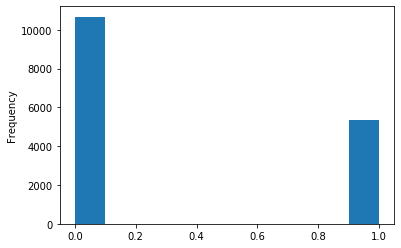

In [57]:
def check_imb_class(df):
    print(df['TARGET'].astype(int).plot.hist())
    
check_imb_class(df_15)

AxesSubplot(0.125,0.125;0.775x0.755)


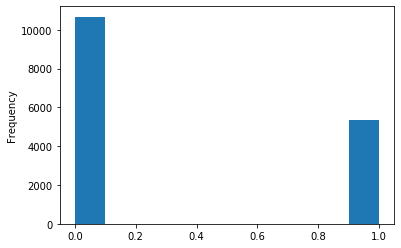

In [58]:
check_imb_class(df_16)

AxesSubplot(0.125,0.125;0.775x0.755)


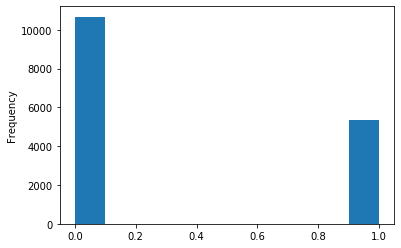

In [59]:
check_imb_class(df_17)

# Train_Test_Split

In [244]:
# splitting the data frame into train and test data 
def my_train_test_split(df):
    
    Predictors=df.drop('TARGET',axis='columns')
    Target=df.TARGET
    
    X_train,X_test,Y_train,Y_test = train_test_split(Predictors,Target,test_size=0.25,random_state=42,stratify=Target)

    return X_train,X_test,Y_train,Y_test

In [61]:
x_train,x_test,y_train,y_test=my_train_test_split(df_15)
xu_train,xu_test,yu_train,yu_test=my_train_test_split(df_16)
xe_train,xe_test,ye_train,ye_test=my_train_test_split(df_17)

# Decision_Tree_Classifier

In [62]:
#                           DECISION TREE CLASSIFIER

modelt = tree.DecisionTreeClassifier()
modelt_u=tree.DecisionTreeClassifier()
modelt_e=tree.DecisionTreeClassifier()

In [63]:
# without feature selection
modelt.fit(x_train,y_train)
modelt.score(x_test,y_test)*100

94.40279860069965

In [64]:
# univariate selection
modelt_u.fit(xu_train,yu_train)
modelt_u.score(xu_test,yu_test)*100

94.62768615692154

In [65]:
# extra tree classifier
modelt_e.fit(xe_train,ye_train)
modelt_e.score(xe_test,ye_test)*100

94.70264867566218

# Naive_Bayes

In [66]:
#                                        NAIVE BAYES

modelNB = GaussianNB()
modelNB_u= GaussianNB()
modelNB_e= GaussianNB()

In [67]:
# without feature selection
modelNB.fit(x_train,y_train)
modelNB.score(x_test,y_test)*100

61.694152923538226

In [68]:
# univariate selection
modelNB_u.fit(xu_train,yu_train)
modelNB_u.score(xu_test,yu_test)*100

59.97001499250375

In [69]:
# extra tree classifier+++
modelNB_e.fit(xe_train,ye_train)
modelNB_e.score(xe_test,ye_test)*100

61.39430284857571

# Support_Vector_Machine

In [70]:
#                                   SUPPORT VECTOR MACHINE

modelSVC = SVC(kernel='sigmoid')
modelSVC_u = SVC(kernel='sigmoid')
modelSVC_e = SVC(kernel='sigmoid')


In [71]:
# without feature selection
modelSVC.fit(x_train,y_train)
modelSVC.score(x_test,y_test)*100

66.66666666666666

In [72]:
# without feature selection
modelSVC_u.fit(xu_train,yu_train)
modelSVC_u.score(xu_test,yu_test)*100

66.66666666666666

In [73]:
# without feature selection
modelSVC_e.fit(xe_train,ye_train)
modelSVC_e.score(xe_test,ye_test)*100

66.66666666666666

# Model_Evaluation:

# For_DecisionTree

In [74]:
#                                  MODEL EVALUATION

# FOR DECISION TREE

predict=modelt.predict(x_test)
predict_u=modelt_u.predict(xu_test)
predict_e=modelt_e.predict(xe_test)


# Confusion_Matrix

In [75]:
#                                CONFUSION MATRIX

# with out feature selection
confusion_matrix(y_test,predict)


array([[2448,  220],
       [   4, 1330]], dtype=int64)

In [76]:
# univariate selection
confusion_matrix(yu_test,predict_u)

array([[2453,  215],
       [   0, 1334]], dtype=int64)

In [77]:
# extra tree classifier
confusion_matrix(ye_test,predict_e)


array([[2461,  207],
       [   5, 1329]], dtype=int64)

# Classification_Report

In [78]:
                               # CLASSIFICATION REPORT
# with out feature selection
print(classification_report(y_test,predict))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2668
           1       0.86      1.00      0.92      1334

    accuracy                           0.94      4002
   macro avg       0.93      0.96      0.94      4002
weighted avg       0.95      0.94      0.94      4002



In [79]:
# univariate selection
print(classification_report(yu_test,predict_u))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2668
           1       0.86      1.00      0.93      1334

    accuracy                           0.95      4002
   macro avg       0.93      0.96      0.94      4002
weighted avg       0.95      0.95      0.95      4002



In [80]:
# extra tree classifier
print(classification_report(ye_test,predict_e))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2668
           1       0.87      1.00      0.93      1334

    accuracy                           0.95      4002
   macro avg       0.93      0.96      0.94      4002
weighted avg       0.95      0.95      0.95      4002



# F-1_and_Accuracy_score

In [81]:
#                               F-1 AND ACCURACY SCORE

print('Accuracy score with all the features =',accuracy_score(y_test,predict)*100,'\n',
     'Accuracy score with univariate selected features =',accuracy_score(yu_test,predict_u)*100,'\n',
     'Accuracy score with extra tree classifier selected features =',accuracy_score(ye_test,predict_e)*100)


print('F1 score with all the features =',f1_score(y_test,predict)*100,'\n',
     'F1 score with univariate selected features =',f1_score(yu_test,predict_u)*100,'\n',
     'F1 score with extra tree classifier selected features =',f1_score(ye_test,predict_e)*100)

Accuracy score with all the features = 94.40279860069965 
 Accuracy score with univariate selected features = 94.62768615692154 
 Accuracy score with extra tree classifier selected features = 94.70264867566218
F1 score with all the features = 92.23300970873788 
 F1 score with univariate selected features = 92.54249046132502 
 F1 score with extra tree classifier selected features = 92.61324041811847


# For_NaiveBayes

In [82]:
                                   # FOR NAVIE BAYES

predictNB=modelNB.predict(x_test)
predictNB_u=modelNB_u.predict(xu_test)
predictNB_e=modelNB_e.predict(xe_test)


# Confusion_Matrix

In [83]:
                                 # CONFUSION MATRIX

# with out feature selection
confusion_matrix(y_test,predictNB)

array([[1895,  773],
       [ 760,  574]], dtype=int64)

In [84]:
# univariate selection
confusion_matrix(yu_test,predictNB_u)

array([[1771,  897],
       [ 705,  629]], dtype=int64)

In [85]:
# extra tree classifier selection
confusion_matrix(ye_test,predictNB_e)

array([[1818,  850],
       [ 695,  639]], dtype=int64)

# Classification_Report

In [86]:
                               # CLASSIFICATION REPORT
# with out feature selection
print(classification_report(y_test,predictNB))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2668
           1       0.43      0.43      0.43      1334

    accuracy                           0.62      4002
   macro avg       0.57      0.57      0.57      4002
weighted avg       0.62      0.62      0.62      4002



In [87]:
# univariate selection
print(classification_report(yu_test,predictNB_u))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69      2668
           1       0.41      0.47      0.44      1334

    accuracy                           0.60      4002
   macro avg       0.56      0.57      0.56      4002
weighted avg       0.61      0.60      0.61      4002



In [88]:
# extra tree classifer selection
print(classification_report(ye_test,predictNB_e))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      2668
           1       0.43      0.48      0.45      1334

    accuracy                           0.61      4002
   macro avg       0.58      0.58      0.58      4002
weighted avg       0.63      0.61      0.62      4002



# F-1_and_Accuracy_score

In [89]:
#                               F-1 AND ACCURACY SCORE

print('Accuracy score with all the features =',accuracy_score(y_test,predictNB)*100,'\n',
     'Accuracy score with univariate selected features =',accuracy_score(yu_test,predictNB_u)*100,'\n',
     'Accuracy score with extra tree classifier selected features =',accuracy_score(ye_test,predictNB_e)*100)


print('F1 score with all the features =',f1_score(y_test,predictNB)*100,'\n',
     'F1 score with univariate selected features =',f1_score(yu_test,predictNB_u)*100,'\n',
     'F1 score with extra tree classifier selected features =',f1_score(ye_test,predictNB_e)*100)

Accuracy score with all the features = 61.694152923538226 
 Accuracy score with univariate selected features = 59.97001499250375 
 Accuracy score with extra tree classifier selected features = 61.39430284857571
F1 score with all the features = 42.819843342036556 
 F1 score with univariate selected features = 43.98601398601399 
 F1 score with extra tree classifier selected features = 45.270988310308184


# For_SupportVectorMachine

In [90]:
#                              FOR SUPPORT VECTOR MACHINE

predictSVC=modelSVC.predict(x_test)
predictSVC_u=modelSVC_u.predict(xu_test)
predictSVC_e=modelSVC_e.predict(xe_test)


# Confusion_Matrix

In [91]:
                                # CONFUSION MATRIX
# with out feature selection
confusion_matrix(y_test,predictSVC)

array([[2668,    0],
       [1334,    0]], dtype=int64)

In [92]:
# univariate selection
confusion_matrix(yu_test,predictSVC_u)

array([[2668,    0],
       [1334,    0]], dtype=int64)

In [93]:
# extra tree classifier selection
confusion_matrix(ye_test,predictSVC_e)

array([[2668,    0],
       [1334,    0]], dtype=int64)

# Classification_Report

In [94]:
                             # CLASSIFICATION REPORT

print(classification_report(y_test,predictSVC))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      2668
           1       0.00      0.00      0.00      1334

    accuracy                           0.67      4002
   macro avg       0.33      0.50      0.40      4002
weighted avg       0.44      0.67      0.53      4002



In [95]:
# univariate selection
print(classification_report(yu_test,predictSVC_u))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      2668
           1       0.00      0.00      0.00      1334

    accuracy                           0.67      4002
   macro avg       0.33      0.50      0.40      4002
weighted avg       0.44      0.67      0.53      4002



In [96]:
# extra tree classifer selection
print(classification_report(ye_test,predictSVC_e))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      2668
           1       0.00      0.00      0.00      1334

    accuracy                           0.67      4002
   macro avg       0.33      0.50      0.40      4002
weighted avg       0.44      0.67      0.53      4002



# F-1_and_Accuracy_score

In [97]:
#                               F-1 AND ACCURACY SCORE

print('Accuracy score with all the features =',accuracy_score(y_test,predictSVC)*100,'\n',
     'Accuracy score with univariate selected features =',accuracy_score(yu_test,predictSVC_u)*100,'\n',
     'Accuracy score with extra tree classifier selected features =',accuracy_score(ye_test,predictSVC_e)*100)


print('F1 score with all the features =',f1_score(y_test,predictSVC)*100,'\n',
     'F1 score with univariate selected features =',f1_score(yu_test,predictSVC_u)*100,'\n',
     'F1 score with extra tree classifier selected features =',f1_score(ye_test,predictSVC_e)*100)

Accuracy score with all the features = 66.66666666666666 
 Accuracy score with univariate selected features = 66.66666666666666 
 Accuracy score with extra tree classifier selected features = 66.66666666666666
F1 score with all the features = 0.0 
 F1 score with univariate selected features = 0.0 
 F1 score with extra tree classifier selected features = 0.0


# Analysis_2

# Filling_the_missing_vals

In [98]:
#                           FILLING THE MISSING VALUES

# Let us see if we fill all the missing values then what results would we get 

miss_vals = missing_values(df_14)
miss_vals.head(122)

Your selected dataframe has 145 columns.
There are 28 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
FLOORSMIN_AVG,208642,67.8
YEARS_BUILD_AVG,204488,66.5
OWN_CAR_AGE,202929,66.0
LANDAREA_AVG,182590,59.4
BASEMENTAREA_AVG,179943,58.5
EXT_SOURCE_1,173378,56.4
NONLIVINGAREA_AVG,169682,55.2
ELEVATORS_AVG,163891,53.3


In [99]:
cols=miss_vals[miss_vals['% of Total Values']<1].index
type(cols)

pandas.core.indexes.base.Index

In [100]:
DF_1=df_14.dropna(subset=cols)

In [101]:
missing_values(DF_1)

Your selected dataframe has 145 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,213745,69.9
NONLIVINGAPARTMENTS_AVG,212402,69.5
FLOORSMIN_AVG,207567,67.9
YEARS_BUILD_AVG,203431,66.5
OWN_CAR_AGE,201790,66.0
LANDAREA_AVG,181656,59.4
BASEMENTAREA_AVG,179035,58.5
EXT_SOURCE_1,172377,56.4
NONLIVINGAREA_AVG,168852,55.2
ELEVATORS_AVG,163094,53.3


In [102]:
DF_1.shape

(305820, 145)

# Imputing_through_median

In [249]:
# As all our values are numeric we will take median

def take_median(df):
    #Moreover, we can apply the same imputation strategy for all the numeric features at once.

    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values

    for col in numeric_cols:
        missing = df[col].isnull()
        num_missing = np.sum(missing)
    
        if num_missing > 0:  # only do the imputation for the columns that have missing values.
            med = df[col].median()
            df[col] = df[col].fillna(med)
    return df

DF_2=take_median(DF_1)
DF_2.shape

(305820, 145)

In [104]:
missing_values(DF_2)

Your selected dataframe has 145 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Finding_imp_of_features

In [105]:
# Now we have cleared all the missing values lets again find out feature importance
Feature_importances,Predictor=cal_feature_imp(DF_2)


# Most_imp_features

In [106]:
Most_imp_feat=most_imp_features(Feature_importances,Predictor)
Most_imp_feat.head()


,feature,importance
31,EXT_SOURCE_3,0.020082
30,EXT_SOURCE_2,0.019693
9,DAYS_BIRTH,0.013052
12,DAYS_ID_PUBLISH,0.012414
11,DAYS_REGISTRATION,0.012059


# Zero_imp_features

In [107]:
Zero_features=zero_imp_features(Most_imp_feat)

There are 6 features with 0.0 importance


# Remove_zerop_imp_features

In [108]:
DF_2=DF_2.drop(columns=Zero_features)
DF_2.shape

(305820, 139)

In [109]:
# reomving negative values
DF_2[['DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]=DF_2[['DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].abs()

DF_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,F,M,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Commercial associate,Maternity leave,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,not specified,org spec account,reg oper account,reg oper spec account,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,Business Entity Type 2,Business Entity Type 3,Construction,Government,Kindergarten,Medicine,Other_val,School,Self-employed,Trade: type 7,Core staff,Drivers,High skill tech staff,Laborers,Managers,Sales staff
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,0.018801,9461.0,637.0,3648.0,2120.0,9.0,1,0,1,1,0,1.0,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0000,0.0000,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,0.003541,16765.0,1188.0,1186.0,291.0,9.0,1,0,1,1,0,2.0,1,11,0,0,0,0,0,0,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0039,0.0098,1.0,0.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,0.010032,19046.0,225.0,4260.0,2531.0,26.0,1,1,1,1,0,1.0,2,9,0,0,0,0,0,0,0.505720,0.555912,0.729567,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,0.1667,0.2083,0.0481,0.0000,0.0036,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,0.008019,19005.0,3039.0,9833.0,2437.0,9.0,1,0,1,0,0,2.0,2,17,0,0,0,0,0,0,0.505720,0.650442,0.535276,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,0.1667,0.2083,0.0481,0.0000,0.0036,2.0,0.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,0.028663,19932.0,3038.0,4311.0,3458.0,9.0,1,0,1,0,0,1.0,2,11,0

# Univariate_selec_tech

In [110]:
DF_3=uni_feature_selec(DF_2)

DF_3.head()

,DAYS_EMPLOYED,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,SK_ID_CURR,Higher education,REG_CITY_NOT_WORK_CITY,M,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,Working,Laborers,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,F,LIVE_CITY_NOT_WORK_CITY,With parents,Panel,Drivers,block of flats,NAME_CONTRACT_TYPE,FLAG_DOCUMENT_6,Self-employed,Secondary / secondary special,AMT_REQ_CREDIT_BUREAU_MON,FLAG_WORK_PHONE,Single / not married,FLAG_DOCUMENT_3,State servant,HOUR_APPR_PROCESS_START,CNT_CHILDREN,Business Entity Type 3,Civil marriage,REGION_RATING_CLIENT,FLAG_PHONE,reg oper account,Rented apartment,FLAG_EMP_PHONE,Construction,EXT_SOURCE_1,Core staff,Widow,ELEVATORS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,Sales staff,FLAG_OWN_CAR,Managers,AMT_REQ_CREDIT_BUREAU_YEAR,Married,TARGET
0,637.0,406597.5,9461.0,202500.0,3648.0,1134.0,2120.0,24700.5,100002,0,0,1,0.262949,0,1,1,0.139376,2.0,2.0,9.0,0,0,0,0,0,1,0,0,0,1,0.0,0,1,1,0,10,0,1,0,2,1,1,0,1,0,0.083037,0,0,0.00,2.0,0,0,0,1.0,0,1
1,1188.0,1293502.5,16765.0,270000.0,1186.0,828.0,291.0,35698.5,100003,1,0,0,0.622246,0,0,0,0.535276,0.0,0.0,9.0,1,0,0,0,0,1,0,0,0,0,0.0,0,0,1,1,11,0,0,0,1,1,1,0,1,0,0.311267,1,0,0.08,1.0,0,0,0,0.0,1,0
2,225.0,135000.0,19046.0,67500.0,4260.0,815.0,2531.0,6750.0,100004,0,0,1,0.555912,0,1,1,0.729567,0.0,0.0,26.0,0,0,0,0,0,0,1,0,0,1,0.0,1,1,0,0,9,0,0,0,2,1,0,0,1,0,0.505720,0,0,0.00,0.0,0,1,0,0.0,0,0
3,3039.0,312682.5,19005.0,135000.0,9833.0,617.0,2437.0,29686.5,100006,0,0,0,0.650442,0,1,1,0.535276,0.0,0.0,9.0,1,0,0,0,0,0,0,0,0,1,0.0,0,0,1,0,17,0,1,1,2,0,0,0,1,0,0.505720,0,0,0.00,2.0,0,0,0,1.0,0,0
4,3038.0,513000.0,19932.0,121500.0,4311.0,1106.0,3458.0,21865.5,100007,0,1,1,0.322738,0,1,0,0.535276,0.0,0.0,9.0,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,0,11,0,0,0,2,0,0,0,1,0,0.505720,1,0,0.00,0.0,0,0,0,0.0,0,0


# ExtraTreeClassifier_selec_tech

In [111]:
DF_4=ext_feature_selec(DF_2)

DF_4.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,SK_ID_CURR,DAYS_REGISTRATION,AMT_CREDIT,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START,AMT_ANNUITY,EXT_SOURCE_1,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,CNT_CHILDREN,FLAG_OWN_REALTY,YEARS_BEGINEXPLUATATION_AVG,AMT_REQ_CREDIT_BUREAU_QRT,OWN_CAR_AGE,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_MON,APARTMENTS_AVG,LANDAREA_AVG,TUESDAY,ENTRANCES_AVG,DEF_30_CNT_SOCIAL_CIRCLE,BASEMENTAREA_AVG,THURSDAY,NONLIVINGAREA_AVG,FLAG_PHONE,FLAG_WORK_PHONE,FRIDAY,WEDNESDAY,MONDAY,YEARS_BUILD_AVG,FLOORSMAX_AVG,COMMONAREA_AVG,FLAG_OWN_CAR,Married,Unaccompanied,Other_val,Business Entity Type 3,Laborers,SATURDAY,DEF_60_CNT_SOCIAL_CIRCLE,Self-employed,Family,FLOORSMIN_AVG,LIVE_CITY_NOT_WORK_CITY,Working,"Stone, brick",REG_CITY_NOT_WORK_CITY,TARGET
0,0.262949,0.139376,9461.0,2120.0,1134.0,100002,3648.0,406597.5,202500.0,0.018801,10,24700.5,0.083037,1.0,637.0,2.0,1.0,0,1,0.9722,0.0,9.0,2,0.0,0.0247,0.0369,0,0.0690,2.0,0.0369,0,0.0000,1,0,0,1,0,0.6192,0.0833,0.0143,0,0,1,0,1,1,0,2.0,0,0,0.1250,0,1,1,0,1
1,0.622246,0.535276,16765.0,291.0,828.0,100003,1186.0,1293502.5,270000.0,0.003541,11,35698.5,0.311267,0.0,1188.0,1.0,2.0,0,0,0.9851,0.0,9.0,1,0.0,0.0959,0.0130,0,0.0345,0.0,0.0529,0,0.0098,1,0,0,0,1,0.7960,0.2917,0.0605,0,1,0,0,0,0,0,0.0,0,1,0.3333,0,0,0,0,0
2,0.555912,0.729567,19046.0,2531.0,815.0,100004,4260.0,135000.0,67500.0,0.010032,9,6750.0,0.505720,0.0,225.0,0.0,1.0,0,1,0.9816,0.0,26.0,2,0.0,0.0876,0.0481,0,0.1379,0.0,0.0763,0,0.0036,1,1,0,0,1,0.7552,0.1667,0.0211,1,0,1,0,0,1,0,0.0,0,0,0.2083,0,1,0,0,0
3,0.650442,0.535276,19005.0,2437.0,617.0,100006,9833.0,312682.5,135000.0,0.008019,17,29686.5,0.505720,1.0,3039.0,2.0,2.0,0,1,0.9816,0.0,9.0,2,0.0,0.0876,0.0481,0,0.1379,0.0,0.0763,0,0.0036,0,0,0,1,0,0.7552,0.1667,0.0211,0,0,1,0,1,1,0,0.0,0,0,0.2083,0,1,0,0,0
4,0.322738,0.535276,19932.0,3458.0,1106.0,100007,4311.0,513000.0,121500.0,0.028663,11,21865.5,0.505720,0.0,3038.0,0.0,1.0,0,1,0.9816,0.0,9.0,2,0.0,0.0876,0.0481,0,0.1379,0.0,0.0763,1,0.0036,0,0,0,0,0,0.7552,0.1667,0.0211,0,0,1,1,0,0,0,0.0,0,0,0.2083,1,1,0,1,0


# Handle_imbalance_classification

In [112]:
DF_2=imb_class(DF_2)
DF_3=imb_class(DF_3)
DF_4=imb_class(DF_4)

AxesSubplot(0.125,0.125;0.775x0.755)


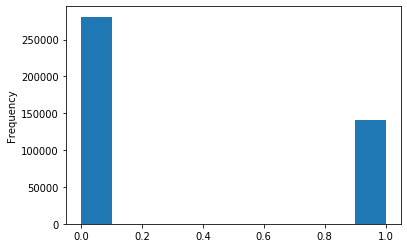

In [113]:
check_imb_class(DF_2)

AxesSubplot(0.125,0.125;0.775x0.755)


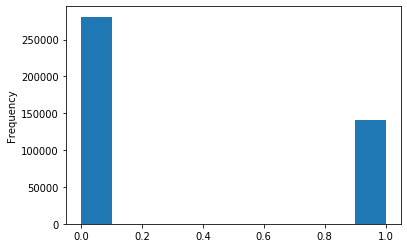

In [114]:
check_imb_class(DF_3)

AxesSubplot(0.125,0.125;0.775x0.755)


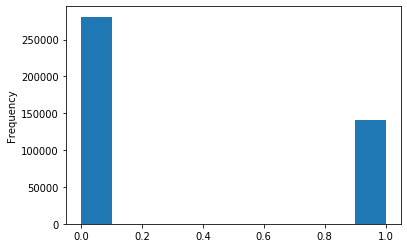

In [115]:
check_imb_class(DF_4)

# Train_Test_Split 

In [116]:
X_train,X_test,Y_train,Y_test=my_train_test_split(DF_2)
Xu_train,Xu_test,Yu_train,Yu_test=my_train_test_split(DF_3)
Xe_train,Xe_test,Ye_train,Ye_test=my_train_test_split(DF_4)

# Model_Training

# For_DecisionTreeClassifier

In [117]:
#                           DECISION TREE CLASSIFIER

Modelt = tree.DecisionTreeClassifier()
Modelt_u=tree.DecisionTreeClassifier()
Modelt_e=tree.DecisionTreeClassifier()

In [118]:
# without feature selection
Modelt.fit(X_train,Y_train)
Modelt.score(X_test,Y_test)*100

92.69206686526384

In [119]:
# with univariate selection
Modelt_u.fit(Xu_train,Yu_train)
Modelt_u.score(Xu_test,Yu_test)*100

92.81065593988957

In [120]:
# with extra tree classifier selection
Modelt_e.fit(Xe_train,Ye_train)
Modelt_e.score(Xe_test,Ye_test)*100

92.81729692806861

# For_NaiveBayes

In [121]:
#                                        NAIVE BAYES

ModelNB = GaussianNB()
ModelNB_u= GaussianNB()
ModelNB_e= GaussianNB()

In [122]:
# without feature selection
ModelNB.fit(X_train,Y_train)
ModelNB.score(X_test,Y_test)*100

65.80080830313265

In [123]:
# with univariate selection
ModelNB_u.fit(Xu_train,Yu_train)
ModelNB_u.score(Xu_test,Yu_test)*100

66.00478151148891

In [124]:
# with extra tree classifier selection
ModelNB_e.fit(Xe_train,Ye_train)
ModelNB_e.score(Xe_test,Ye_test)*100

65.92603836593742

# For_SupportVectorMachine

In [125]:
#                                   SUPPORT VECTOR MACHINE

ModelSVC = SVC(kernel='sigmoid')
ModelSVC_u = SVC(kernel='sigmoid')
ModelSVC_e = SVC(kernel='sigmoid')

In [126]:
X_train,x,a=np.array_split(X_train,3)
Y_train,y,b=np.array_split(Y_train,3)

print(X_train.shape)
print(Y_train.shape)

(105406, 138)
(105406,)


In [127]:
# without feature selection
ModelSVC.fit(X_train,Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [128]:
Xu_train,x,a=np.array_split(Xu_train,3)
Yu_train,y,b=np.array_split(Yu_train,3)

print(Xu_train.shape)
print(Yu_train.shape)

(105406, 55)
(105406,)


In [129]:
# with univariate selection
ModelSVC_u.fit(Xu_train,Yu_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [130]:
Xe_train,x,a=np.array_split(Xe_train,3)
Ye_train,y,b=np.array_split(Ye_train,3)

print(Xu_train.shape)
print(Yu_train.shape)

(105406, 55)
(105406,)


In [131]:
# with extra tree classifier selection
ModelSVC_e.fit(Xe_train,Ye_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Model_Evaluation 

# For_DecisionTreeClassifier

In [132]:
#                                  MODEL EVALUATION

# FOR DECISION TREE

Predict=Modelt.predict(X_test)
Predict_u=Modelt_u.predict(Xu_test)
Predict_e=Modelt_e.predict(Xe_test)


# Confusion_Matrix

In [133]:
#                                CONFUSION MATRIX

# with out feature selection
confusion_matrix(Y_test,Predict)


array([[62886,  7385],
       [  318, 34817]], dtype=int64)

In [134]:

# univariate selection
confusion_matrix(yu_test,predict_u)


array([[2453,  215],
       [   0, 1334]], dtype=int64)

In [135]:
# extra tree classifier
confusion_matrix(ye_test,predict_e)


array([[2461,  207],
       [   5, 1329]], dtype=int64)

# Classification_Report

In [136]:
                               # CLASSIFICATION REPORT
# with out feature selection
print(classification_report(Y_test,Predict))


              precision    recall  f1-score   support

           0       0.99      0.89      0.94     70271
           1       0.83      0.99      0.90     35135

    accuracy                           0.93    105406
   macro avg       0.91      0.94      0.92    105406
weighted avg       0.94      0.93      0.93    105406



In [137]:
# univariate selection
print(classification_report(Yu_test,Predict_u))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94     70271
           1       0.83      0.99      0.90     35135

    accuracy                           0.93    105406
   macro avg       0.91      0.94      0.92    105406
weighted avg       0.94      0.93      0.93    105406



In [138]:
# extra tree classifier
print(classification_report(Ye_test,Predict_e))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94     70271
           1       0.83      0.99      0.90     35135

    accuracy                           0.93    105406
   macro avg       0.91      0.94      0.92    105406
weighted avg       0.94      0.93      0.93    105406



# F-1_and_Accuracy_score

In [139]:
#                               F-1 AND ACCURACY SCORE

print('Accuracy score with all the features =',accuracy_score(Y_test,Predict)*100,'\n',
     'Accuracy score with univariate selected features =',accuracy_score(Yu_test,Predict_u)*100,'\n',
     'Accuracy score with extra tree classifier selected features =',accuracy_score(Ye_test,Predict_e)*100)


print('F1 score with all the features =',f1_score(Y_test,Predict)*100,'\n',
     'F1 score with univariate selected features =',f1_score(Yu_test,Predict_u)*100,'\n',
     'F1 score with extra tree classifier selected features =',f1_score(Ye_test,Predict_e)*100)


Accuracy score with all the features = 92.69206686526384 
 Accuracy score with univariate selected features = 92.81065593988957 
 Accuracy score with extra tree classifier selected features = 92.81729692806861
F1 score with all the features = 90.03969639370548 
 F1 score with univariate selected features = 90.18698850098414 
 F1 score with extra tree classifier selected features = 90.19821079478515


# For_NaiveBayes

In [140]:
                                   # FOR NAVIE BAYES

PredictNB=ModelNB.predict(X_test)
PredictNB_u=ModelNB_u.predict(Xu_test)
PredictNB_e=ModelNB_e.predict(Xe_test)


# Confusion_Matrix

In [141]:
                                 # CONFUSION MATRIX

# with out feature selection
confusion_matrix(Y_test,PredictNB)

array([[68706,  1565],
       [34483,   652]], dtype=int64)

In [142]:
# univariate selection
confusion_matrix(Yu_test,PredictNB_u)

array([[69118,  1153],
       [34680,   455]], dtype=int64)

In [143]:
# extra tree classifier selection
confusion_matrix(Ye_test,PredictNB_e)

array([[68947,  1324],
       [34592,   543]], dtype=int64)

# Classification_Report

In [144]:
                               # CLASSIFICATION REPORT
# with out feature selection
print(classification_report(Y_test,PredictNB))

              precision    recall  f1-score   support

           0       0.67      0.98      0.79     70271
           1       0.29      0.02      0.03     35135

    accuracy                           0.66    105406
   macro avg       0.48      0.50      0.41    105406
weighted avg       0.54      0.66      0.54    105406



In [145]:
# univariate selection
print(classification_report(Yu_test,PredictNB_u))

              precision    recall  f1-score   support

           0       0.67      0.98      0.79     70271
           1       0.28      0.01      0.02     35135

    accuracy                           0.66    105406
   macro avg       0.47      0.50      0.41    105406
weighted avg       0.54      0.66      0.54    105406



In [146]:

# extra tree classifer selection
print(classification_report(Ye_test,PredictNB_e))

              precision    recall  f1-score   support

           0       0.67      0.98      0.79     70271
           1       0.29      0.02      0.03     35135

    accuracy                           0.66    105406
   macro avg       0.48      0.50      0.41    105406
weighted avg       0.54      0.66      0.54    105406



# F1_and_Accuracy_score

In [147]:
#                               F-1 AND ACCURACY SCORE

print('Accuracy score with all the features =',accuracy_score(Y_test,PredictNB)*100,'\n',
     'Accuracy score with univariate selected features =',accuracy_score(Yu_test,PredictNB_u)*100,'\n',
     'Accuracy score with extra tree classifier selected features =',accuracy_score(Ye_test,PredictNB_e)*100)


print('F1 score with all the features =',f1_score(Y_test,PredictNB)*100,'\n',
     'F1 score with univariate selected features =',f1_score(Yu_test,PredictNB_u)*100,'\n',
     'F1 score with extra tree classifier selected features =',f1_score(Ye_test,PredictNB_e)*100)


Accuracy score with all the features = 65.80080830313265 
 Accuracy score with univariate selected features = 66.00478151148891 
 Accuracy score with extra tree classifier selected features = 65.92603836593742
F1 score with all the features = 3.491111587063612 
 F1 score with univariate selected features = 2.4766622213755 
 F1 score with extra tree classifier selected features = 2.9349764877574183


# For_SupportVectorMachine

In [148]:
#                              FOR SUPPORT VECTOR MACHINE
X_test,x,a=np.array_split(X_test,3)
Y_test,y,b=np.array_split(Y_test,3)

Xu_test,x,a=np.array_split(Xu_test,3)
Yu_test,y,b=np.array_split(Yu_test,3)

Xe_test,x,a=np.array_split(Xe_test,3)
Ye_test,y,b=np.array_split(Ye_test,3)

print(Xu_train.shape)
print(Yu_train.shape)


(105406, 55)
(105406,)


In [149]:
PredictSVC=ModelSVC.predict(X_test)

In [150]:
PredictSVC_u=ModelSVC_u.predict(Xu_test)


In [151]:
PredictSVC_e=ModelSVC_e.predict(Xe_test)

# Confusion_Matrix

In [152]:
                                # CONFUSION MATRIX
# with out feature selection
confusion_matrix(Y_test,PredictSVC)


array([[23532,     0],
       [11604,     0]], dtype=int64)

In [153]:
# univariate selection
confusion_matrix(Yu_test,PredictSVC_u)

array([[23532,     0],
       [11604,     0]], dtype=int64)

In [154]:
# extra tree classifier selection
confusion_matrix(Ye_test,PredictSVC_e)

array([[23532,     0],
       [11604,     0]], dtype=int64)

# Classification_Report

In [155]:

                             # CLASSIFICATION REPORT

print(classification_report(Y_test,PredictSVC))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     23532
           1       0.00      0.00      0.00     11604

    accuracy                           0.67     35136
   macro avg       0.33      0.50      0.40     35136
weighted avg       0.45      0.67      0.54     35136



In [156]:
# univariate selection
print(classification_report(Yu_test,PredictSVC_u))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     23532
           1       0.00      0.00      0.00     11604

    accuracy                           0.67     35136
   macro avg       0.33      0.50      0.40     35136
weighted avg       0.45      0.67      0.54     35136



In [157]:

# extra tree classifer selection
print(classification_report(Ye_test,PredictSVC_e))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     23532
           1       0.00      0.00      0.00     11604

    accuracy                           0.67     35136
   macro avg       0.33      0.50      0.40     35136
weighted avg       0.45      0.67      0.54     35136



# F1_and_Accuracy_score

In [158]:
#                               F-1 AND ACCURACY SCORE

print('Accuracy score with all the features =',accuracy_score(Y_test,PredictSVC)*100,'\n',
     'Accuracy score with univariate selected features =',accuracy_score(Yu_test,PredictSVC_u)*100,'\n',
     'Accuracy score with extra tree classifier selected features =',accuracy_score(Ye_test,PredictSVC_e)*100)


print('F1 score with all the features =',f1_score(Y_test,PredictSVC)*100,'\n',
     'F1 score with univariate selected features =',f1_score(Yu_test,PredictSVC_u)*100,'\n',
     'F1 score with extra tree classifier selected features =',f1_score(Ye_test,PredictSVC_e)*100)

Accuracy score with all the features = 66.974043715847 
 Accuracy score with univariate selected features = 66.974043715847 
 Accuracy score with extra tree classifier selected features = 66.974043715847
F1 score with all the features = 0.0 
 F1 score with univariate selected features = 0.0 
 F1 score with extra tree classifier selected features = 0.0


# Hyper_Parameter_Tuning 

In [159]:
#                             HYPER-PARAMETER-TUNING

# As from our results we can clearly see that Decision tree is our best preforming algorithm but we have to find
# best parameters for it
from sklearn.model_selection import RandomizedSearchCV

max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1,X_train.shape[1]))

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth":max_depths ,
              "max_features": max_features,
              "min_samples_leaf": min_samples_leafs,
              'min_samples_split':min_samples_splits,
              "criterion": ["gini", "entropy"]}

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(Modelt, param_dist, cv=5)

In [160]:
tree_cv.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [161]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_split': 0.6, 'min_samples_leaf': 0.30000000000000004, 'max_features': 72, 'max_depth': 10.0, 'criterion': 'gini'}


In [162]:
param_dist = {"max_depth":max_depths ,
              "max_features": list(range(1,Xu_train.shape[1])),
              "min_samples_leaf": min_samples_leafs,
              'min_samples_split':min_samples_splits,
              "criterion": ["gini", "entropy"]}

tree_2 = RandomizedSearchCV(Modelt_u, param_dist, cv=5)

In [163]:
tree_2.fit(Xu_train,Yu_train) 
print("Tuned Decision Tree Parameters: {}".format(tree_2.best_params_))

Tuned Decision Tree Parameters: {'min_samples_split': 0.8, 'min_samples_leaf': 0.2, 'max_features': 23, 'max_depth': 27.0, 'criterion': 'gini'}


In [181]:
param_dist = {"max_depth":max_depths ,
              "max_features": list(range(1,Xe_train.shape[1])),
              "min_samples_leaf": min_samples_leafs,
              'min_samples_split':min_samples_splits,
              "criterion": ["gini", "entropy"]}

tree_3 = RandomizedSearchCV(Modelt_e, param_dist, cv=5)

In [182]:
tree_3.fit(Xe_train,Ye_train) 
print("Tuned Decision Tree Parameters: {}".format(tree_3.best_params_))

Tuned Decision Tree Parameters: {'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 0.1, 'max_features': 29, 'max_depth': 27.0, 'criterion': 'entropy'}


In [216]:
DF_4.iloc[:,:29]

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,SK_ID_CURR,DAYS_REGISTRATION,AMT_CREDIT,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START,AMT_ANNUITY,EXT_SOURCE_1,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,CNT_CHILDREN,FLAG_OWN_REALTY,YEARS_BEGINEXPLUATATION_AVG,AMT_REQ_CREDIT_BUREAU_QRT,OWN_CAR_AGE,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_MON,APARTMENTS_AVG,LANDAREA_AVG,TUESDAY,ENTRANCES_AVG,DEF_30_CNT_SOCIAL_CIRCLE
0,0.262949,0.139376,9461.0,2120.0,1134.0,100002.0,3648.0,406597.5,202500.0,0.018801,10.0,24700.5,0.083037,1.0,637.0,2.0,1.0,0.0,1.0,0.9722,0.0,9.0,2.0,0.0,0.0247,0.0369,0.0,0.0690,2.0
1,0.622246,0.535276,16765.0,291.0,828.0,100003.0,1186.0,1293502.5,270000.0,0.003541,11.0,35698.5,0.311267,0.0,1188.0,1.0,2.0,0.0,0.0,0.9851,0.0,9.0,1.0,0.0,0.0959,0.0130,0.0,0.0345,0.0
2,0.555912,0.729567,19046.0,2531.0,815.0,100004.0,4260.0,135000.0,67500.0,0.010032,9.0,6750.0,0.505720,0.0,225.0,0.0,1.0,0.0,1.0,0.9816,0.0,26.0,2.0,0.0,0.0876,0.0481,0.0,0.1379,0.0
3,0.650442,0.535276,19005.0,2437.0,617.0,100006.0,9833.0,312682.5,135000.0,0.008019,17.0,29686.5,0.505720,1.0,3039.0,2.0,2.0,0.0,1.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.0,0.1379,0.0
4,0.322738,0.535276,19932.0,3458.0,1106.0,100007.0,4311.0,513000.0,121500.0,0.028663,11.0,21865.5,0.505720,0.0,3038.0,0.0,1.0,0.0,1.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.0,0.1379,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421619,0.243037,0.633032,18415.0,1953.0,1610.0,445139.0,6245.0,904500.0,171000.0,0.026392,10.0,35176.5,0.661145,1.0,429.0,1.0,2.0,0.0,0.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.0,0.1379,0.0
421620,0.369890,0.600658,13312.0,5953.0,864.0,172324.0,6478.0,177768.0,135000.0,0.025164,15.0,13063.5,0.346836,2.0,1259.0,3.0,3.0,1.0,1.0,0.9727,0.0,9.0,2.0,0.0,0.0825,0.0153,0.0,0.1379,1.0
421621,0.009660,0.495666,20071.0,3564.0,758.0,109993.0,3227.0,723996.0,126000.0,0.015221,8.0,34960.5,0.505720,2.0,365243.0,0.0,2.0,0.0,1.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.0,0.1379,0.0
421622,0.507606,0.265049,10133.0,2807.0,639.0,149738.0,4754.0,728460.0,202500.0,0.010147,14.0,57685.5,0.205500,1.0,1019.0,3.0,2.0,0.0,1.0,0.9771,0.0,11.0,2.0,0.0,0.0330,0.0481,0.0,0.0690,0.0


In [217]:
New_DataFrame=DF_4.iloc[:,:29]

In [218]:
New_DataFrame.drop('TUESDAY',axis=1)

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,SK_ID_CURR,DAYS_REGISTRATION,AMT_CREDIT,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START,AMT_ANNUITY,EXT_SOURCE_1,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,CNT_CHILDREN,FLAG_OWN_REALTY,YEARS_BEGINEXPLUATATION_AVG,AMT_REQ_CREDIT_BUREAU_QRT,OWN_CAR_AGE,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_MON,APARTMENTS_AVG,LANDAREA_AVG,ENTRANCES_AVG,DEF_30_CNT_SOCIAL_CIRCLE
0,0.262949,0.139376,9461.0,2120.0,1134.0,100002.0,3648.0,406597.5,202500.0,0.018801,10.0,24700.5,0.083037,1.0,637.0,2.0,1.0,0.0,1.0,0.9722,0.0,9.0,2.0,0.0,0.0247,0.0369,0.0690,2.0
1,0.622246,0.535276,16765.0,291.0,828.0,100003.0,1186.0,1293502.5,270000.0,0.003541,11.0,35698.5,0.311267,0.0,1188.0,1.0,2.0,0.0,0.0,0.9851,0.0,9.0,1.0,0.0,0.0959,0.0130,0.0345,0.0
2,0.555912,0.729567,19046.0,2531.0,815.0,100004.0,4260.0,135000.0,67500.0,0.010032,9.0,6750.0,0.505720,0.0,225.0,0.0,1.0,0.0,1.0,0.9816,0.0,26.0,2.0,0.0,0.0876,0.0481,0.1379,0.0
3,0.650442,0.535276,19005.0,2437.0,617.0,100006.0,9833.0,312682.5,135000.0,0.008019,17.0,29686.5,0.505720,1.0,3039.0,2.0,2.0,0.0,1.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.1379,0.0
4,0.322738,0.535276,19932.0,3458.0,1106.0,100007.0,4311.0,513000.0,121500.0,0.028663,11.0,21865.5,0.505720,0.0,3038.0,0.0,1.0,0.0,1.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.1379,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421619,0.243037,0.633032,18415.0,1953.0,1610.0,445139.0,6245.0,904500.0,171000.0,0.026392,10.0,35176.5,0.661145,1.0,429.0,1.0,2.0,0.0,0.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.1379,0.0
421620,0.369890,0.600658,13312.0,5953.0,864.0,172324.0,6478.0,177768.0,135000.0,0.025164,15.0,13063.5,0.346836,2.0,1259.0,3.0,3.0,1.0,1.0,0.9727,0.0,9.0,2.0,0.0,0.0825,0.0153,0.1379,1.0
421621,0.009660,0.495666,20071.0,3564.0,758.0,109993.0,3227.0,723996.0,126000.0,0.015221,8.0,34960.5,0.505720,2.0,365243.0,0.0,2.0,0.0,1.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.1379,0.0
421622,0.507606,0.265049,10133.0,2807.0,639.0,149738.0,4754.0,728460.0,202500.0,0.010147,14.0,57685.5,0.205500,1.0,1019.0,3.0,2.0,0.0,1.0,0.9771,0.0,11.0,2.0,0.0,0.0330,0.0481,0.0690,0.0


In [219]:
target=DF_4.iloc[:,-1]
target=pd.DataFrame(target)
target

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
421619,1
421620,1
421621,1
421622,1


In [220]:
New_DataFrame=pd.concat([New_DataFrame,target],axis=1)
New_DataFrame

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,SK_ID_CURR,DAYS_REGISTRATION,AMT_CREDIT,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START,AMT_ANNUITY,EXT_SOURCE_1,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,CNT_CHILDREN,FLAG_OWN_REALTY,YEARS_BEGINEXPLUATATION_AVG,AMT_REQ_CREDIT_BUREAU_QRT,OWN_CAR_AGE,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_MON,APARTMENTS_AVG,LANDAREA_AVG,TUESDAY,ENTRANCES_AVG,DEF_30_CNT_SOCIAL_CIRCLE,TARGET
0,0.262949,0.139376,9461.0,2120.0,1134.0,100002.0,3648.0,406597.5,202500.0,0.018801,10.0,24700.5,0.083037,1.0,637.0,2.0,1.0,0.0,1.0,0.9722,0.0,9.0,2.0,0.0,0.0247,0.0369,0.0,0.0690,2.0,1
1,0.622246,0.535276,16765.0,291.0,828.0,100003.0,1186.0,1293502.5,270000.0,0.003541,11.0,35698.5,0.311267,0.0,1188.0,1.0,2.0,0.0,0.0,0.9851,0.0,9.0,1.0,0.0,0.0959,0.0130,0.0,0.0345,0.0,0
2,0.555912,0.729567,19046.0,2531.0,815.0,100004.0,4260.0,135000.0,67500.0,0.010032,9.0,6750.0,0.505720,0.0,225.0,0.0,1.0,0.0,1.0,0.9816,0.0,26.0,2.0,0.0,0.0876,0.0481,0.0,0.1379,0.0,0
3,0.650442,0.535276,19005.0,2437.0,617.0,100006.0,9833.0,312682.5,135000.0,0.008019,17.0,29686.5,0.505720,1.0,3039.0,2.0,2.0,0.0,1.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.0,0.1379,0.0,0
4,0.322738,0.535276,19932.0,3458.0,1106.0,100007.0,4311.0,513000.0,121500.0,0.028663,11.0,21865.5,0.505720,0.0,3038.0,0.0,1.0,0.0,1.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.0,0.1379,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421619,0.243037,0.633032,18415.0,1953.0,1610.0,445139.0,6245.0,904500.0,171000.0,0.026392,10.0,35176.5,0.661145,1.0,429.0,1.0,2.0,0.0,0.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.0,0.1379,0.0,1
421620,0.369890,0.600658,13312.0,5953.0,864.0,172324.0,6478.0,177768.0,135000.0,0.025164,15.0,13063.5,0.346836,2.0,1259.0,3.0,3.0,1.0,1.0,0.9727,0.0,9.0,2.0,0.0,0.0825,0.0153,0.0,0.1379,1.0,1
421621,0.009660,0.495666,20071.0,3564.0,758.0,109993.0,3227.0,723996.0,126000.0,0.015221,8.0,34960.5,0.505720,2.0,365243.0,0.0,2.0,0.0,1.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.0,0.1379,0.0,1
421622,0.507606,0.265049,10133.0,2807.0,639.0,149738.0,4754.0,728460.0,202500.0,0.010147,14.0,57685.5,0.205500,1.0,1019.0,3.0,2.0,0.0,1.0,0.9771,0.0,11.0,2.0,0.0,0.0330,0.0481,0.0,0.0690,0.0,1


In [221]:
New_Df=New_DataFrame

In [222]:
New_Df['DAYS_BIRTH']=New_Df['DAYS_BIRTH']/365
New_Df['DAYS_BIRTH'].describe()

count    421624.000000
mean         43.062508
std          11.908366
min          20.517808
25%          33.079452
50%          41.978082
75%          52.884932
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [223]:
New_Df['DAYS_ID_PUBLISH']=New_Df['DAYS_ID_PUBLISH']/365
New_Df['DAYS_ID_PUBLISH'].describe()

count    421624.000000
mean          8.013392
std           4.151535
min           0.000000
25%           4.441096
50%           8.572603
75%          11.660274
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

In [224]:
New_Df['DAYS_LAST_PHONE_CHANGE']=New_Df['DAYS_LAST_PHONE_CHANGE']/30
New_Df['DAYS_LAST_PHONE_CHANGE'].describe()

count    421624.000000
mean         30.721703
std          27.072800
min           0.000000
25%           8.400000
50%          23.600000
75%          50.700000
max         143.066667
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [225]:
New_Df['DAYS_REGISTRATION']=New_Df['DAYS_REGISTRATION']/365
New_Df['DAYS_REGISTRATION'].describe()

count    421624.000000
mean         13.273734
std           9.499057
min           0.000000
25%           5.221918
50%          11.980822
75%          19.860274
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

In [226]:
(New_Df['DAYS_EMPLOYED']==365243.0).value_counts()

False    352667
True      68957
Name: DAYS_EMPLOYED, dtype: int64

In [228]:
New_Df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [231]:
print(round(New_Df['DAYS_EMPLOYED'].mean()))

2221


In [232]:
New_Df['DAYS_EMPLOYED'].fillna(2221.0)

0          637.0
1         1188.0
2          225.0
3         3039.0
4         3038.0
           ...  
421619     429.0
421620    1259.0
421621    2221.0
421622    1019.0
421623     437.0
Name: DAYS_EMPLOYED, Length: 421624, dtype: float64

In [235]:
New_Df['DAYS_EMPLOYED']=New_Df['DAYS_EMPLOYED']/365
New_Df['DAYS_EMPLOYED'].describe()

count    352667.000000
mean          6.084786
std           6.093163
min           0.000000
25%           1.947945
50%           4.145205
75%           8.104110
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [237]:
New_Df.drop('TUESDAY',axis=1,inplace=True)
New_Df

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,SK_ID_CURR,DAYS_REGISTRATION,AMT_CREDIT,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START,AMT_ANNUITY,EXT_SOURCE_1,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,CNT_CHILDREN,FLAG_OWN_REALTY,YEARS_BEGINEXPLUATATION_AVG,AMT_REQ_CREDIT_BUREAU_QRT,OWN_CAR_AGE,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_MON,APARTMENTS_AVG,LANDAREA_AVG,ENTRANCES_AVG,DEF_30_CNT_SOCIAL_CIRCLE,TARGET
0,0.262949,0.139376,25.920548,5.808219,37.800000,100002.0,9.994521,406597.5,202500.0,0.018801,10.0,24700.5,0.083037,1.0,1.745205,2.0,1.0,0.0,1.0,0.9722,0.0,9.0,2.0,0.0,0.0247,0.0369,0.0690,2.0,1
1,0.622246,0.535276,45.931507,0.797260,27.600000,100003.0,3.249315,1293502.5,270000.0,0.003541,11.0,35698.5,0.311267,0.0,3.254795,1.0,2.0,0.0,0.0,0.9851,0.0,9.0,1.0,0.0,0.0959,0.0130,0.0345,0.0,0
2,0.555912,0.729567,52.180822,6.934247,27.166667,100004.0,11.671233,135000.0,67500.0,0.010032,9.0,6750.0,0.505720,0.0,0.616438,0.0,1.0,0.0,1.0,0.9816,0.0,26.0,2.0,0.0,0.0876,0.0481,0.1379,0.0,0
3,0.650442,0.535276,52.068493,6.676712,20.566667,100006.0,26.939726,312682.5,135000.0,0.008019,17.0,29686.5,0.505720,1.0,8.326027,2.0,2.0,0.0,1.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.1379,0.0,0
4,0.322738,0.535276,54.608219,9.473973,36.866667,100007.0,11.810959,513000.0,121500.0,0.028663,11.0,21865.5,0.505720,0.0,8.323288,0.0,1.0,0.0,1.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.1379,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421619,0.243037,0.633032,50.452055,5.350685,53.666667,445139.0,17.109589,904500.0,171000.0,0.026392,10.0,35176.5,0.661145,1.0,1.175342,1.0,2.0,0.0,0.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.1379,0.0,1
421620,0.369890,0.600658,36.471233,16.309589,28.800000,172324.0,17.747945,177768.0,135000.0,0.025164,15.0,13063.5,0.346836,2.0,3.449315,3.0,3.0,1.0,1.0,0.9727,0.0,9.0,2.0,0.0,0.0825,0.0153,0.1379,1.0,1
421621,0.009660,0.495666,54.989041,9.764384,25.266667,109993.0,8.841096,723996.0,126000.0,0.015221,8.0,34960.5,0.505720,2.0,NaN,0.0,2.0,0.0,1.0,0.9816,0.0,9.0,2.0,0.0,0.0876,0.0481,0.1379,0.0,1
421622,0.507606,0.265049,27.761644,7.690411,21.300000,149738.0,13.024658,728460.0,202500.0,0.010147,14.0,57685.5,0.205500,1.0,2.791781,3.0,2.0,0.0,1.0,0.9771,0.0,11.0,2.0,0.0,0.0330,0.0481,0.0690,0.0,1


In [238]:
New_Df_1=New_Df.drop(['EXT_SOURCE_2','EXT_SOURCE_3','REGION_POPULATION_RELATIVE','EXT_SOURCE_1','YEARS_BEGINEXPLUATATION_AVG','APARTMENTS_AVG','LANDAREA_AVG','ENTRANCES_AVG'],axis=1)

In [240]:
New_Df_1

,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,SK_ID_CURR,DAYS_REGISTRATION,AMT_CREDIT,AMT_INCOME_TOTAL,HOUR_APPR_PROCESS_START,AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_REQ_CREDIT_BUREAU_QRT,OWN_CAR_AGE,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_MON,DEF_30_CNT_SOCIAL_CIRCLE,TARGET
0,25.920548,5.808219,37.800000,100002.0,9.994521,406597.5,202500.0,10.0,24700.5,1.0,1.745205,2.0,1.0,0.0,1.0,0.0,9.0,2.0,0.0,2.0,1
1,45.931507,0.797260,27.600000,100003.0,3.249315,1293502.5,270000.0,11.0,35698.5,0.0,3.254795,1.0,2.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0
2,52.180822,6.934247,27.166667,100004.0,11.671233,135000.0,67500.0,9.0,6750.0,0.0,0.616438,0.0,1.0,0.0,1.0,0.0,26.0,2.0,0.0,0.0,0
3,52.068493,6.676712,20.566667,100006.0,26.939726,312682.5,135000.0,17.0,29686.5,1.0,8.326027,2.0,2.0,0.0,1.0,0.0,9.0,2.0,0.0,0.0,0
4,54.608219,9.473973,36.866667,100007.0,11.810959,513000.0,121500.0,11.0,21865.5,0.0,8.323288,0.0,1.0,0.0,1.0,0.0,9.0,2.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421619,50.452055,5.350685,53.666667,445139.0,17.109589,904500.0,171000.0,10.0,35176.5,1.0,1.175342,1.0,2.0,0.0,0.0,0.0,9.0,2.0,0.0,0.0,1
421620,36.471233,16.309589,28.800000,172324.0,17.747945,177768.0,135000.0,15.0,13063.5,2.0,3.449315,3.0,3.0,1.0,1.0,0.0,9.0,2.0,0.0,1.0,1
421621,54.989041,9.764384,25.266667,109993.0,8.841096,723996.0,126000.0,8.0,34960.5,2.0,NaN,0.0,2.0,0.0,1.0,0.0,9.0,2.0,0.0,0.0,1
421622,27.761644,7.690411,21.300000,149738.0,13.024658,728460.0,202500.0,14.0,57685.5,1.0,2.791781,3.0,2.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,1


In [241]:
New_Df_2=New_Df_1[['SK_ID_CURR','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_REQ_CREDIT_BUREAU_YEAR',
                   'DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION',
                   'HOUR_APPR_PROCESS_START','DAYS_EMPLOYED','OBS_30_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'FLAG_OWN_REALTY','AMT_REQ_CREDIT_BUREAU_QRT','OWN_CAR_AGE','REGION_RATING_CLIENT',
                   'AMT_REQ_CREDIT_BUREAU_MON','DEF_30_CNT_SOCIAL_CIRCLE','TARGET']]
New_Df_2

,SK_ID_CURR,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,HOUR_APPR_PROCESS_START,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_REQ_CREDIT_BUREAU_QRT,OWN_CAR_AGE,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_MON,DEF_30_CNT_SOCIAL_CIRCLE,TARGET
0,100002.0,406597.5,202500.0,24700.5,1.0,25.920548,5.808219,37.800000,9.994521,10.0,1.745205,2.0,1.0,0.0,1.0,0.0,9.0,2.0,0.0,2.0,1
1,100003.0,1293502.5,270000.0,35698.5,0.0,45.931507,0.797260,27.600000,3.249315,11.0,3.254795,1.0,2.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0
2,100004.0,135000.0,67500.0,6750.0,0.0,52.180822,6.934247,27.166667,11.671233,9.0,0.616438,0.0,1.0,0.0,1.0,0.0,26.0,2.0,0.0,0.0,0
3,100006.0,312682.5,135000.0,29686.5,1.0,52.068493,6.676712,20.566667,26.939726,17.0,8.326027,2.0,2.0,0.0,1.0,0.0,9.0,2.0,0.0,0.0,0
4,100007.0,513000.0,121500.0,21865.5,0.0,54.608219,9.473973,36.866667,11.810959,11.0,8.323288,0.0,1.0,0.0,1.0,0.0,9.0,2.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421619,445139.0,904500.0,171000.0,35176.5,1.0,50.452055,5.350685,53.666667,17.109589,10.0,1.175342,1.0,2.0,0.0,0.0,0.0,9.0,2.0,0.0,0.0,1
421620,172324.0,177768.0,135000.0,13063.5,2.0,36.471233,16.309589,28.800000,17.747945,15.0,3.449315,3.0,3.0,1.0,1.0,0.0,9.0,2.0,0.0,1.0,1
421621,109993.0,723996.0,126000.0,34960.5,2.0,54.989041,9.764384,25.266667,8.841096,8.0,NaN,0.0,2.0,0.0,1.0,0.0,9.0,2.0,0.0,0.0,1
421622,149738.0,728460.0,202500.0,57685.5,1.0,27.761644,7.690411,21.300000,13.024658,14.0,2.791781,3.0,2.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,1


In [242]:
new_Df=New_Df[['SK_ID_CURR','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_REQ_CREDIT_BUREAU_YEAR',
                   'DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION',
                   'HOUR_APPR_PROCESS_START','DAYS_EMPLOYED','OBS_30_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'FLAG_OWN_REALTY','AMT_REQ_CREDIT_BUREAU_QRT','OWN_CAR_AGE','REGION_RATING_CLIENT',
                   'AMT_REQ_CREDIT_BUREAU_MON','DEF_30_CNT_SOCIAL_CIRCLE','TARGET','EXT_SOURCE_2','EXT_SOURCE_3',
               'REGION_POPULATION_RELATIVE','EXT_SOURCE_1','YEARS_BEGINEXPLUATATION_AVG','APARTMENTS_AVG',
               'LANDAREA_AVG','ENTRANCES_AVG']]
new_Df

,SK_ID_CURR,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,HOUR_APPR_PROCESS_START,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_REQ_CREDIT_BUREAU_QRT,OWN_CAR_AGE,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_MON,DEF_30_CNT_SOCIAL_CIRCLE,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,REGION_POPULATION_RELATIVE,EXT_SOURCE_1,YEARS_BEGINEXPLUATATION_AVG,APARTMENTS_AVG,LANDAREA_AVG,ENTRANCES_AVG
0,100002.0,406597.5,202500.0,24700.5,1.0,25.920548,5.808219,37.800000,9.994521,10.0,1.745205,2.0,1.0,0.0,1.0,0.0,9.0,2.0,0.0,2.0,1,0.262949,0.139376,0.018801,0.083037,0.9722,0.0247,0.0369,0.0690
1,100003.0,1293502.5,270000.0,35698.5,0.0,45.931507,0.797260,27.600000,3.249315,11.0,3.254795,1.0,2.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0,0.622246,0.535276,0.003541,0.311267,0.9851,0.0959,0.0130,0.0345
2,100004.0,135000.0,67500.0,6750.0,0.0,52.180822,6.934247,27.166667,11.671233,9.0,0.616438,0.0,1.0,0.0,1.0,0.0,26.0,2.0,0.0,0.0,0,0.555912,0.729567,0.010032,0.505720,0.9816,0.0876,0.0481,0.1379
3,100006.0,312682.5,135000.0,29686.5,1.0,52.068493,6.676712,20.566667,26.939726,17.0,8.326027,2.0,2.0,0.0,1.0,0.0,9.0,2.0,0.0,0.0,0,0.650442,0.535276,0.008019,0.505720,0.9816,0.0876,0.0481,0.1379
4,100007.0,513000.0,121500.0,21865.5,0.0,54.608219,9.473973,36.866667,11.810959,11.0,8.323288,0.0,1.0,0.0,1.0,0.0,9.0,2.0,0.0,0.0,0,0.322738,0.535276,0.028663,0.505720,0.9816,0.0876,0.0481,0.1379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421619,445139.0,904500.0,171000.0,35176.5,1.0,50.452055,5.350685,53.666667,17.109589,10.0,1.175342,1.0,2.0,0.0,0.0,0.0,9.0,2.0,0.0,0.0,1,0.243037,0.633032,0.026392,0.661145,0.9816,0.0876,0.0481,0.1379
421620,172324.0,177768.0,135000.0,13063.5,2.0,36.471233,16.309589,28.800000,17.747945,15.0,3.449315,3.0,3.0,1.0,1.0,0.0,9.0,2.0,0.0,1.0,1,0.369890,0.600658,0.025164,0.346836,0.9727,0.0825,0.0153,0.1379
421621,109993.0,723996.0,126000.0,34960.5,2.0,54.989041,9.764384,25.266667,8.841096,8.0,NaN,0.0,2.0,0.0,1.0,0.0,9.0,2.0,0.0,0.0,1,0.009660,0.495666,0.015221,0.505720,0.9816,0.0876,0.0481,0.1379
421622,149738.0,728460.0,202500.0,57685.5,1.0,27.761644,7.690411,21.300000,13.024658,14.0,2.791781,3.0,2.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,1,0.507606,0.265049,0.010147,0.205500,0.9771,0.0330,0.0481,0.0690


In [250]:
new_Df=take_median(new_Df)

In [262]:
New_Df_2=take_median(New_Df_2)

In [264]:
X_Train,X_Test,Y_Train,Y_Test=my_train_test_split(new_Df)
Xu_Train,Xu_Test,Yu_Train,Yu_Test=my_train_test_split(New_Df_2)


In [265]:
final_Modelt = tree.DecisionTreeClassifier(min_samples_split=0.30000000000000004,min_samples_leaf=0.1,max_depth=27.0,
                                           criterion='entropy')
finale_Modelt_u=tree.DecisionTreeClassifier(min_samples_split=0.30000000000000004,min_samples_leaf=0.1,
                                            max_depth=27.0,criterion='entropy')


In [266]:
final_Modelt.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=27.0,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [267]:
finale_Modelt_u.fit(Xu_Train,Yu_Train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=27.0,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [268]:
import pickle
with open('Bank_loan_model.pickle','wb') as f:
    pickle.dump(Modelt_e,f)

In [269]:
with open('Bank_loan_model_1.pickle','wb') as f:
    pickle.dump(final_Modelt,f)

In [270]:
with open('Bank_loan_model_2.pickle','wb') as f:
    pickle.dump(finale_Modelt_u,f)